## Project - EDA on Credit Risk 


## Author - Hitul Adatiya


## Source - https://www.kaggle.com/datasets/laotse/credit-risk-dataset


## Contact details - hitul.a@gmail.com, hitul@outlook.com

## Contents

###  1. About Dataset - Source , What it Contains, How it will be Useful.
###  2. Importing Libraries / APIs / Datasets
###  3. Segregating Dataset
###  4. Preliminary Investigation of Data
###  5. About Target Variable
###  6. Domain Knowledge
###  7. About Categorical Variables
###  8. Descriptive Statistics
###  9. Missing Values
### 10. Duplicate Values
### 11. Imbalanced - ness of Target Variable
### 12. Distribution, Skewness, Kurtosis
### 13. Variance / Standard Deviation
### 14. Outliers & Anomalies
### 15. Detailed Insights (Variable - wise)
### 16. Insights from Bi - variate Analysis
### 17. Important Insights
### 18. Data Pre - Processing Checklist

##  1. About Dataset - Source, Features


### Quick Feature Description

Feature - 1  --->  Age (in years)

Feature - 2  --->  Annual Income (In INR)

Feature - 3  --->  Home ownership (Nominal Categorical)

Feature - 4  --->  Employment length (in years)

Feature - 5  --->  Loan intention (Purpose of Loan)

Feature - 6  --->  Loan grade (Ordinal Categorical)

Feature - 7  --->  Loan amount (in INR)

Feature - 8  --->  Interest rate (in percentage)

#### Feature - 9  --->  Loan status (0 is non default 1 is default)  ---> Target ---> Binary Classification

Feature - 10 --->  Loan - Percent income  (Debt - Equity Ratio) (in percentage)

Feature - 11 --->  History of default (Nominal Categorical)

Feature - 12 --->  Credit history length (in years)

### Source - Kaggle Dataset

## 2. Importing Libraries / APIs / Datasets

In [2]:
# Data Manipulation Libraries
import numpy as np
import pandas as pd


# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline   
# ---> It is an example of a predefined magic function in Ipython.%matplotlib inline makes
#      your plot outputs appear and be stored within the notebook.
import seaborn as sns
%config InlineBackend.figure_format = 'retina'  # ---> Plotting pretty figures and avoid blurry images.
sns.set_style("darkgrid")


# Specialized Library for Missing Values
import missingno as msno


# For Uni - Variate Analysis
from sklearn.feature_selection import VarianceThreshold

# Other Libraries
import os
import io
import requests
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import Dataset

df = pd.read_csv("E:\\LEARNBAY\\Datasets\\credit_risk_dataset.csv", skipinitialspace = True)


# Note

# 1. Parameter to remove whitespace ---> (skipinitialspace = True)

In [4]:
# Back - up Copy

df_copy = df.copy(deep = True)

## 3. Segregating Dataset

1. Segregating Target Variable from Predictors
2. Segregating Numerical Variables from Categorical Variables

In [5]:
# Segregating Target Variable from Predictors

df_x = df.drop(labels = ["loan_status"], axis = 1)  # ---> (32581, 11)
df_y = df["loan_status"]   # ---> (32581,)

In [6]:
# Segregating Numerical Variables from Categorical Variables

df_num = df.select_dtypes(include='number')                # ---> (32581, 8)
df_cat = df.select_dtypes(include=['object','category'])   # ---> (32581, 4)

## 4. Preliminary Investigation of Data

1. df.sample()
2. df.shape
3. df.info()
4. df.size
5. df.describe(include = "O")
6. df["loan_status"].describe()

In [7]:
df.sample(5).style.background_gradient(cmap='Pastel2')

In [8]:
# About dimensions of DataFrame

df.shape

(32581, 12)

In [9]:
# Information about no. of Variables and its Type.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [10]:
df.size

390972

## 5. About Target Variable

1. df["loan_status"].describe()
2. df.loan_status.value_counts() / len(df) * 100
3. Pie Chart
4. Bar Chart

In [11]:
# About Target Variable.

df["loan_status"].describe()

count    32581.000000
mean         0.218164
std          0.413006
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

In [12]:
df.loan_status.value_counts() / len(df) * 100

0    78.183604
1    21.816396
Name: loan_status, dtype: float64

<AxesSubplot:ylabel='loan_status'>

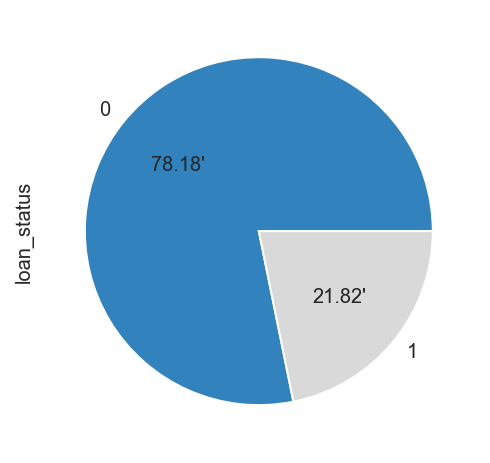

In [13]:
df["loan_status"].value_counts().plot(kind="pie", autopct ="%.2f'", cmap= 'tab20c')

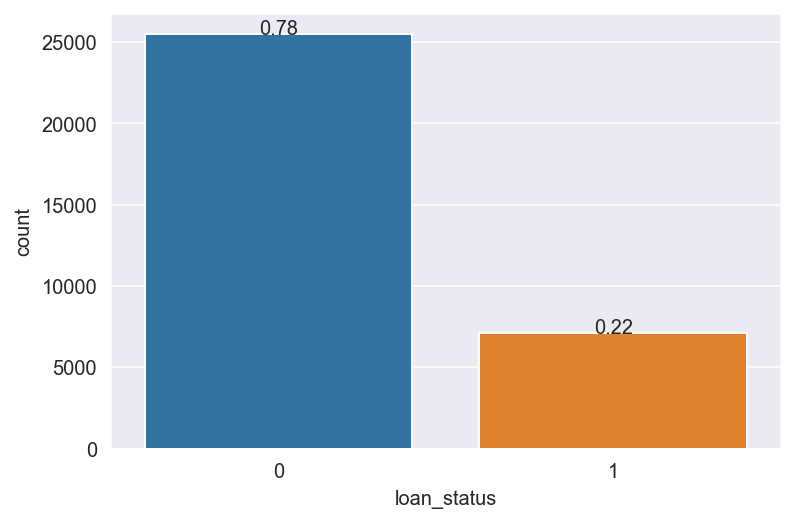

In [14]:
# Countplot (Bar Chart) for distribution of Target Variable

total = float(len(df)) # one person per row

ax = sns.countplot(x = "loan_status", data = df)         # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

In [15]:
cor_target = df.corrwith(df["loan_status"])

cor_target


# 1. Though this method of variable ranking has more relevance in Regression model, 
#    it gives some insights. ???

person_age                   -0.021629
person_income                -0.144449
person_emp_length            -0.082489
loan_amnt                     0.105376
loan_int_rate                 0.335133
loan_status                   1.000000
loan_percent_income           0.379366
cb_person_cred_hist_length   -0.015529
dtype: float64

In [16]:
# Sort the variables in descending order (Ranking of Variables w.r.t. to corr with Target)

cor_target.sort_values(axis = 0, ascending = False)

loan_status                   1.000000
loan_percent_income           0.379366
loan_int_rate                 0.335133
loan_amnt                     0.105376
cb_person_cred_hist_length   -0.015529
person_age                   -0.021629
person_emp_length            -0.082489
person_income                -0.144449
dtype: float64

## 6. Domain Knowledge

### Domain Knowledge  - I

1. Loan Percent Income Variable ---> Numerical Variable which essentially means the loan amount as percentage of income of   borrower.

2. In finance jargaon, it is called as **"Debt to Income ratio". (DTI)**

3. It is one of the most important deciding factor while lending a loan.

4. It is calculated as,
                  **DTI ratio = Total monthly debt payments/Gross monthly income (before Tax) X 100.**
                  
5. Good / Ideal DTI ratio ---> The percentage of DTI ratio may vary from lender to lender. However, in general, a DTI ratio of up to 40% may be considered suitable for getting a loan approved. DTI of **21% - 35% is considered as very good.**.

6. A low debt-to-income (DTI) ratio demonstrates a good balance between debt and income. In other words, if your DTI ratio    is 15%, that means that 15% of your monthly gross income goes to debt payments each month.

### Domain Knowledge - II

1. Person's Credit History length ---> Length of Credit History.

2. Longer the history, more knowledge about the Borrower which means more transparency and ultimately more reliable.
   So, based on Domain knowledge, Person's Credit History length variable is positively correlated with Target Variable.
   This shall be cross- verified using correlation matrix, Scatter Plot and Heat Map in later part of the Project.

## 6. About Categorical Variables

1. df.describe(include = "O").T
2. df.select_dtypes(include=['object','category']).columns.tolist()
3. df_cat = df.select_dtypes(include=['object','category'])
4. df.dtypes.value_counts()
5. df["person_home_ownership"].value_counts()
6. df.person_home_ownership.value_counts() / len(df) * 100
7. df[cat_col].mode()
8. Types of Categorical values
9. Bar Plot of distribution of unique values of Categorical Variables

In [17]:
# A quick glance over Categorical Variables

df.describe(include = "O").T

count unique        top   freq
person_home_ownership      32581      4       RENT  16446
loan_intent                32581      6  EDUCATION   6453
loan_grade                 32581      7          A  10777
cb_person_default_on_file  32581      2          N  26836

In [18]:
df.select_dtypes(include=['object','category']).columns.tolist()

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [19]:
# List of Categorical Variables in a DataFrame

df_cat = df.select_dtypes(include=['object','category'])
df_cat.count()

person_home_ownership        32581
loan_intent                  32581
loan_grade                   32581
cb_person_default_on_file    32581
dtype: int64

In [20]:
# No of Categorical Variables in a DataFrame

df.dtypes.value_counts()

int64      5
object     4
float64    3
dtype: int64

In [21]:
# Frequncy of Unique Values in each Categorical Variable

df["person_home_ownership"].value_counts()
df["loan_intent"].value_counts()
df["loan_grade"].value_counts()
df["cb_person_default_on_file"].value_counts()

N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64

<AxesSubplot:ylabel='cb_person_default_on_file'>

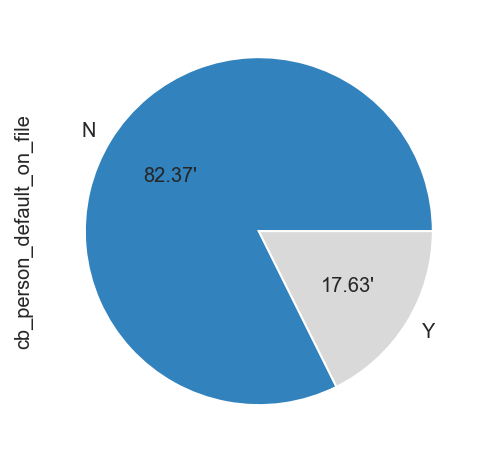

In [22]:
df["cb_person_default_on_file"].value_counts().plot(kind="pie", autopct ="%.2f'", cmap= 'tab20c')

# Histrory of Default - Yes - True - 17.63%
# Not History of Default - No - False - 82.37%

In [23]:
# Frequency of Unique Values in each Categorical Variable in percentage form

df.person_home_ownership.value_counts() / len(df) * 100
df.loan_intent.value_counts() / len(df) * 100
(df.loan_grade.value_counts() / len(df) * 100).round(2)
df.cb_person_default_on_file.value_counts() / len(df) * 100


#   OR 


(df.person_home_ownership.value_counts(normalize = True) * 100).round(2)
(df.loan_intent.value_counts(normalize = True) * 100).round(2)
(df.loan_grade.value_counts(normalize = True) * 100).round(2)
# (df.cb_person_default_on_file.value_counts(normalize = True) * 100).round(2)

A    33.08
B    32.08
C    19.82
D    11.13
E     2.96
F     0.74
G     0.20
Name: loan_grade, dtype: float64

In [24]:
# Mode of Categorical Values

cat_col = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]

df[cat_col].mode()

person_home_ownership loan_intent loan_grade cb_person_default_on_file
0                  RENT   EDUCATION          A                         N

<AxesSubplot:xlabel='cb_person_default_on_file', ylabel='count'>

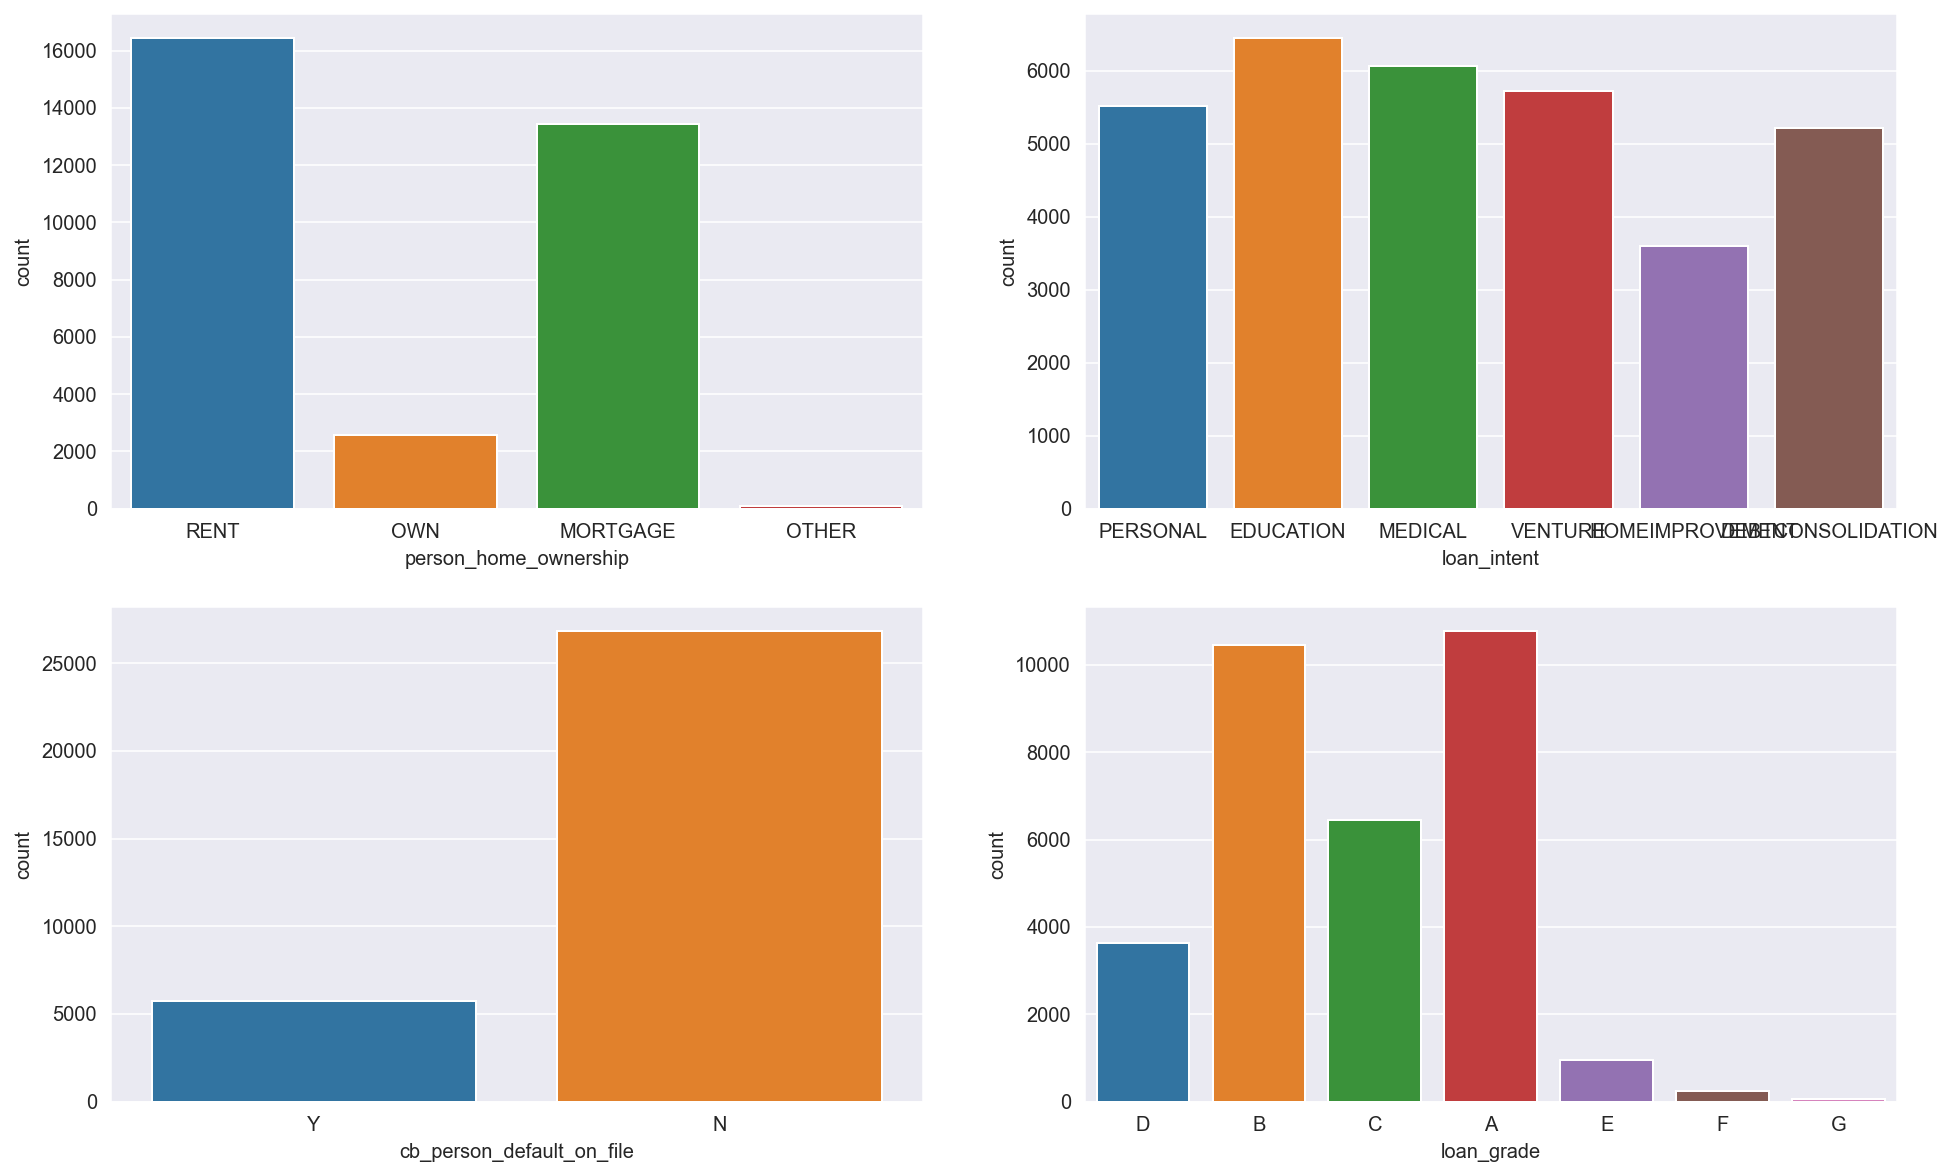

In [25]:
# Countplot of all Categorical variables

fig,axes = plt.subplots(2,2, figsize=(16,10))

sns.countplot('person_home_ownership',data=df,ax=axes[0,0])
sns.countplot('loan_intent',data=df,ax=axes[0,1])
sns.countplot('loan_grade',data=df,ax=axes[1,1])
sns.countplot('cb_person_default_on_file',data=df,ax=axes[1,0])

<AxesSubplot:xlabel='cb_person_default_on_file', ylabel='count'>

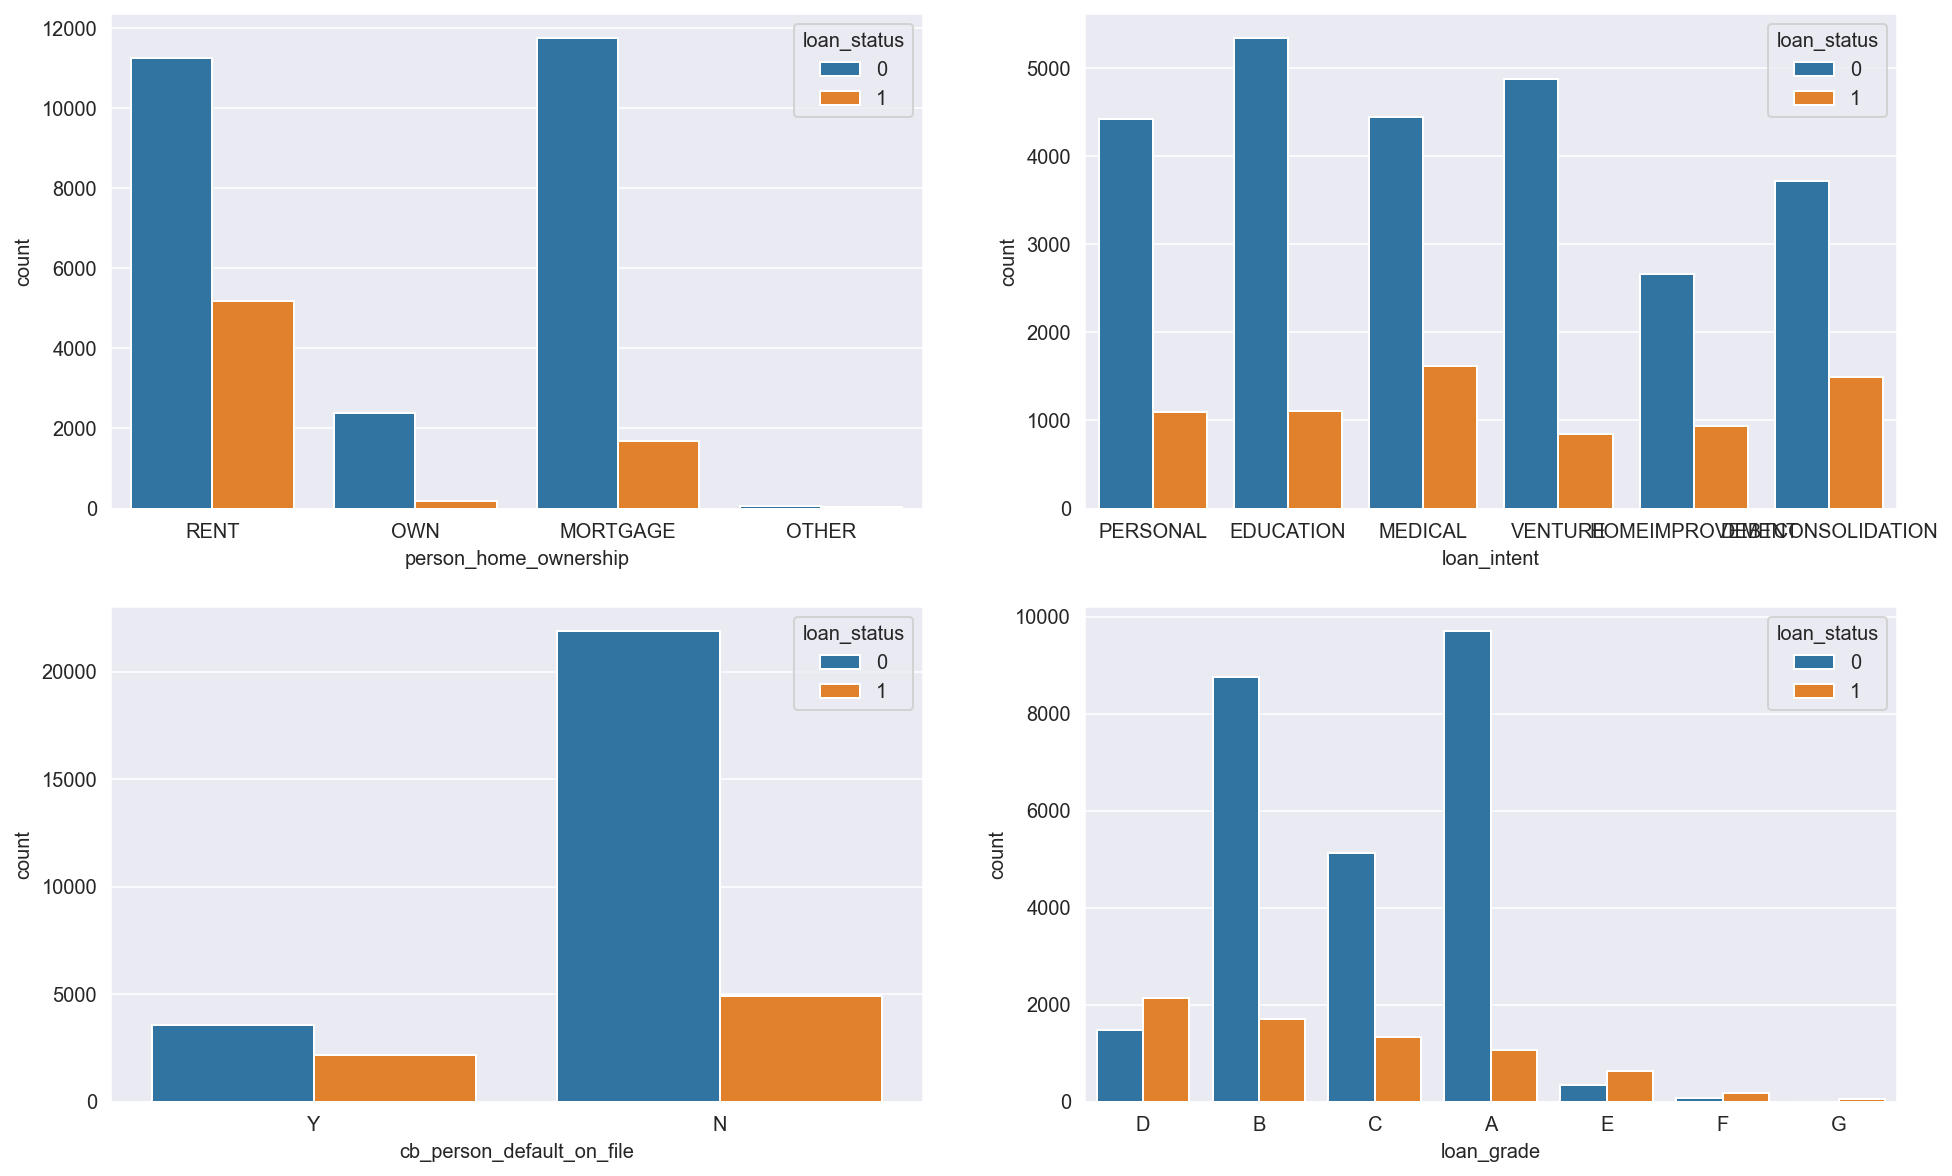

In [26]:
# Bi - Variate Analysis of Categorical Variables vis-a-vis Target Variables.

fig,axes = plt.subplots(2,2, figsize=(16,10))

sns.countplot('person_home_ownership', hue = "loan_status", data = df, ax = axes[0,0])
sns.countplot('loan_intent', hue = "loan_status", data = df, ax = axes[0,1])
sns.countplot('loan_grade', hue = "loan_status", data = df, ax = axes[1,1])
sns.countplot('cb_person_default_on_file', hue = "loan_status", data = df, ax = axes[1,0])

## 7. Descriptive Statistics

In [27]:
# Basic Stastical summary of Numercial variables.

df_num.describe().T.round(2)

count      mean       std      min       25%  \
person_age                  32581.0     27.73      6.35    20.00     23.00   
person_income               32581.0  66074.85  61983.12  4000.00  38500.00   
person_emp_length           31686.0      4.79      4.14     0.00      2.00   
loan_amnt                   32581.0   9589.37   6322.09   500.00   5000.00   
loan_int_rate               29465.0     11.01      3.24     5.42      7.90   
loan_status                 32581.0      0.22      0.41     0.00      0.00   
loan_percent_income         32581.0      0.17      0.11     0.00      0.09   
cb_person_cred_hist_length  32581.0      5.80      4.06     2.00      3.00   

                                 50%       75%         max  
person_age                     26.00     30.00      144.00  
person_income               55000.00  79200.00  6000000.00  
person_emp_length               4.00      7.00      123.00  
loan_amnt                    8000.00  12200.00    35000.00  
loan_int_rate                  10.99     13.47       23.22  
loan_status                     0.00      0.00        1.00  
loan_percent_income             0.15      0.23        0.83  
cb_person_cred_hist_length      4.00      8.00       30.00

## 8. Missing Values

1. df.isnull().sum()
2. df.isna().sum()
3. df.isnull().sum().sum()
4. df.isnull().mean() * 100
5. percent_missing = df.isnull().sum() * 100 / len(df)
6. percent_missing = df.isnull().sum().sort_values(ascending = False) * 100 / len(df)
7. df.isnull().sum().sort_values(ascending = False)
8. df.isna().sum().sort_values(ascending = False)
9. Missing Value Visualization - Bar Chart
10. Missing Value Visualization - Dendogram

In [28]:
# Missing Values

df.isnull().sum().sort_values(ascending = False)
df.isna().sum().sort_values(ascending = False)


# Note

# 1. Both yield same output.

loan_int_rate                 3116
person_emp_length              895
person_age                       0
person_income                    0
person_home_ownership            0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [29]:
# Total Missing Values in a DataFrame

df.isnull().sum().sum()

4011

In [34]:
# Column-wise Missing Values in relative form. 

percent_missing = (df.isnull().sum().sort_values(ascending = False) * 100 / len(df)).round(2)
percent_missing

loan_int_rate                 9.56
person_emp_length             2.75
person_age                    0.00
person_income                 0.00
person_home_ownership         0.00
loan_intent                   0.00
loan_grade                    0.00
loan_amnt                     0.00
loan_status                   0.00
loan_percent_income           0.00
cb_person_default_on_file     0.00
cb_person_cred_hist_length    0.00
dtype: float64

<AxesSubplot:>

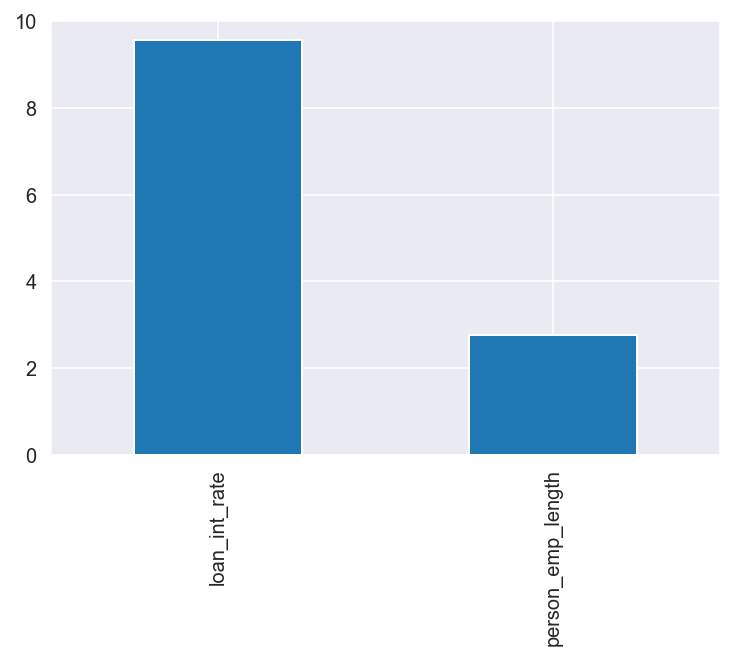

In [35]:
# Bar Chart of Missing Values Column- wise in percentage form.

percent_missing[percent_missing != 0].plot(kind='bar')

In [31]:
! pip install missingno --quiet

<AxesSubplot:>

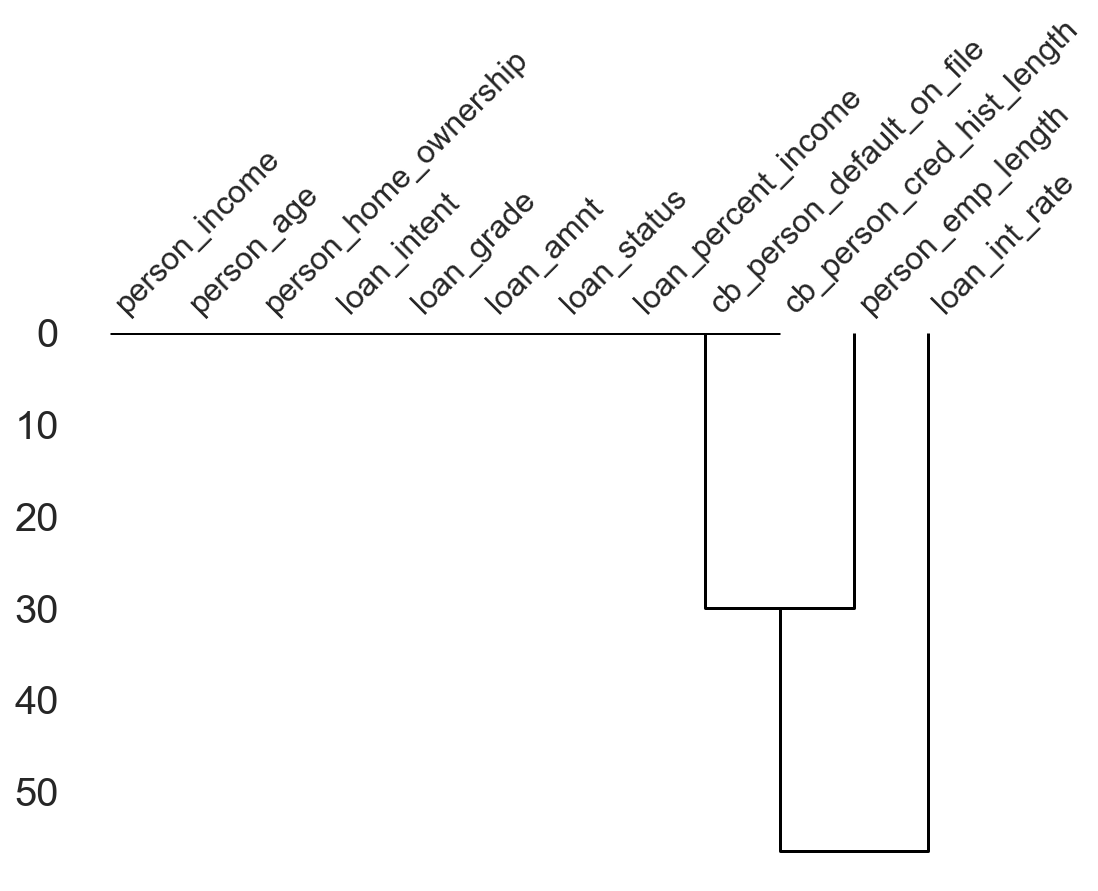

In [42]:
# Dendogram of Missing Values

msno.dendrogram(df, figsize = (8, 5))

## 9. Duplicate Values

1. df.duplicated().sum()
2. df.loc[df.duplicated(), :]

In [43]:
# Duplicate Values

df.duplicated().sum()

165

In [44]:
df.loc[df.duplicated(), :]

person_age  person_income person_home_ownership  person_emp_length  \
15975          23          42000                  RENT                5.0   
15989          23          90000              MORTGAGE                7.0   
15995          24          48000              MORTGAGE                4.0   
16025          24          10000                  RENT                8.0   
16028          23         100000              MORTGAGE                7.0   
...           ...            ...                   ...                ...   
32010          42          39996              MORTGAGE                2.0   
32047          36         250000                  RENT                2.0   
32172          49         120000              MORTGAGE               12.0   
32259          39          40000                   OWN                4.0   
32279          43          11340                  RENT                4.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
15975            VENTURE          B       6000           9.99            0   
15989          EDUCATION          B       8000          10.36            0   
15995            MEDICAL          A       4000           5.42            0   
16025           PERSONAL          A       3000           7.90            1   
16028          EDUCATION          A      15000           7.88            0   
...                  ...        ...        ...            ...          ...   
32010    HOMEIMPROVEMENT          A       2500           5.42            0   
32047  DEBTCONSOLIDATION          A      20000           7.88            0   
32172            MEDICAL          B      12000          10.99            0   
32259            VENTURE          B       1000          10.37            0   
32279          EDUCATION          C       1950            NaN            1   

       loan_percent_income cb_person_default_on_file  \
15975                 0.14                         N   
15989                 0.09                         N   
15995                 0.08                         N   
16025                 0.30                         N   
16028                 0.15                         N   
...                    ...                       ...   
32010                 0.06                         N   
32047                 0.08                         N   
32172                 0.10                         N   
32259                 0.03                         N   
32279                 0.17                         N   

       cb_person_cred_hist_length  
15975                           4  
15989                           3  
15995                           4  
16025                           3  
16028                           4  
...                           ...  
32010                          12  
32047                          17  
32172                          12  
32259                          16  
32279                          11  

[165 rows x 12 columns]

## 10. Imbalanced - ness of Target Variable

1. df.loan_status.value_counts()
2. df.loan_status.value_counts() / len(df) * 100

In [45]:
df.loan_status.value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

In [47]:
(df.loan_status.value_counts() / len(df) * 100).round(2)

0    78.18
1    21.82
Name: loan_status, dtype: float64

## 11. Distribution, Skewness, Kurtosis

1. Density Plot for Distribution
2. df[""].skew()
3. df.kurtosis()

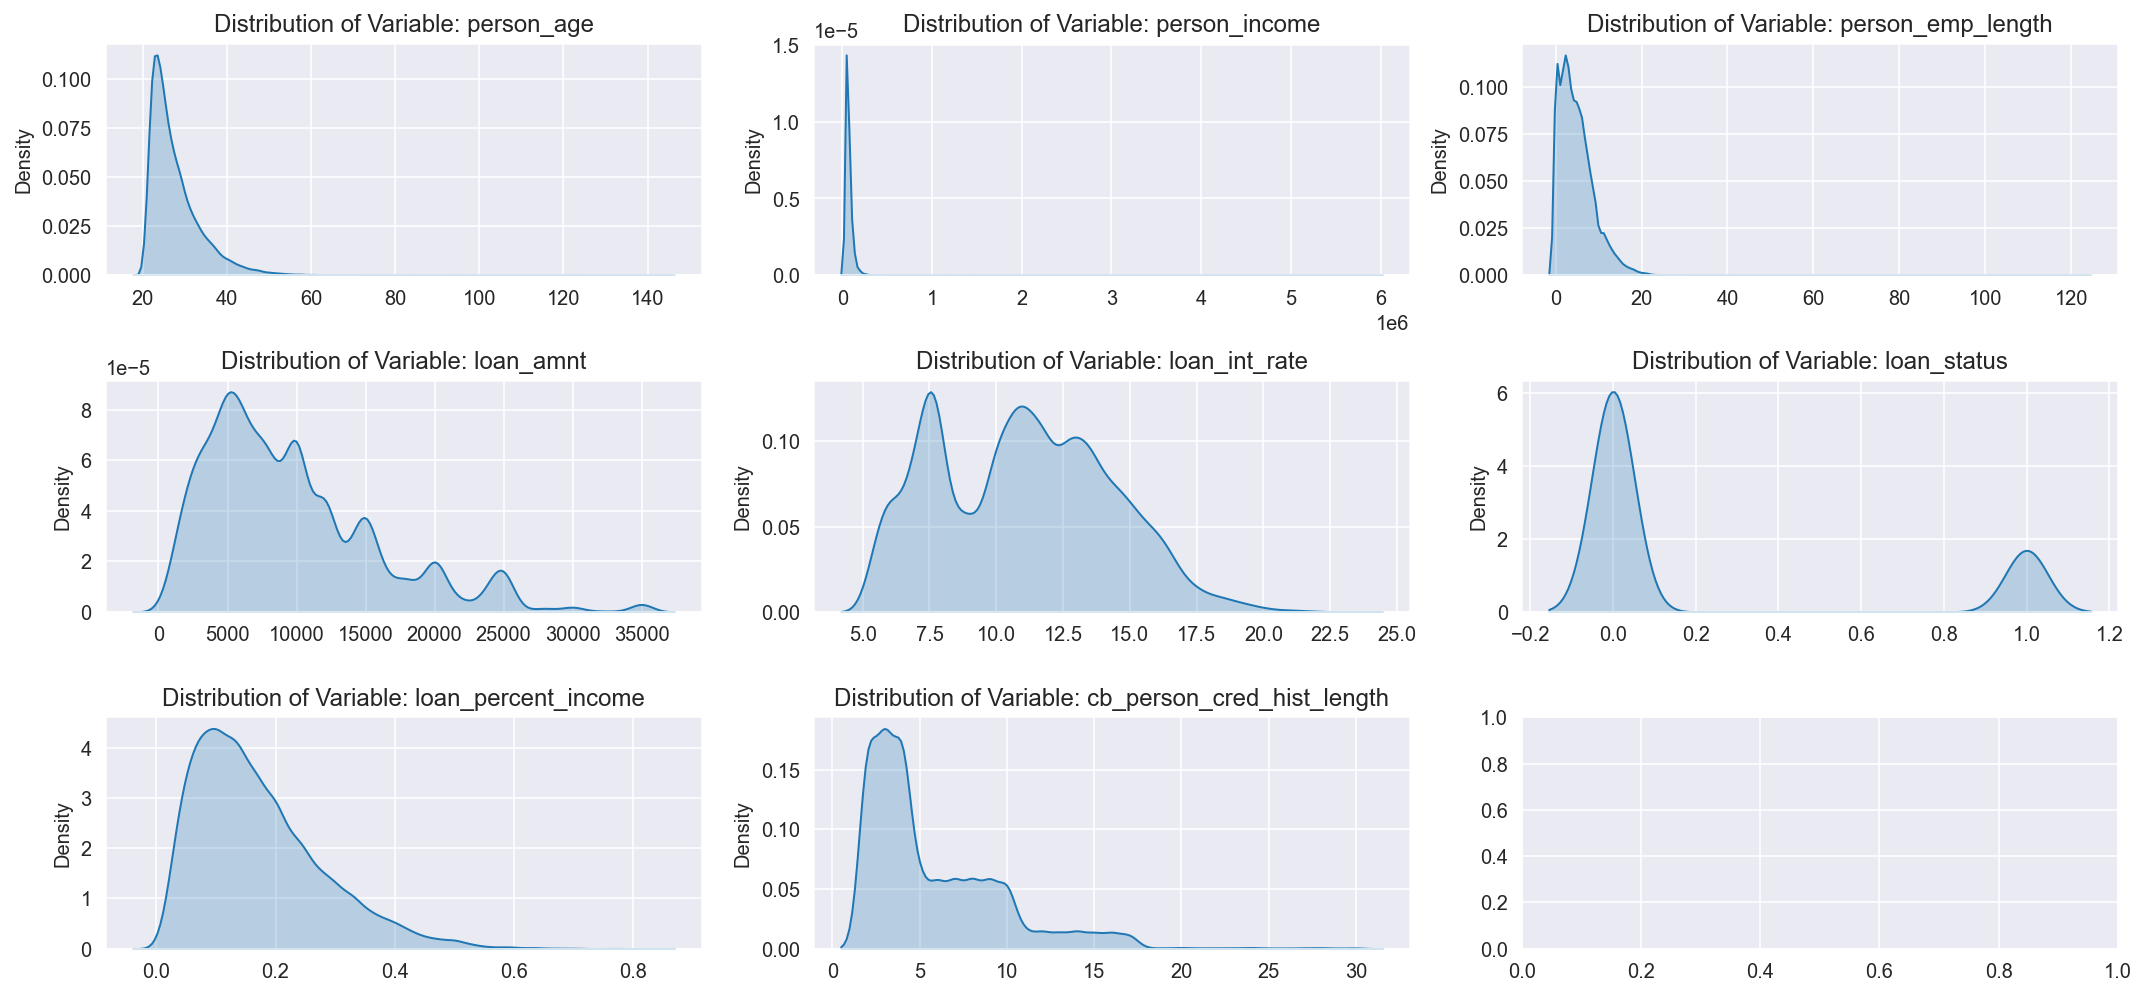

In [49]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 7), sharex = False, sharey = False)
axes = axes.ravel()  # array to 1D
cols = df_num.columns[:]  # create a list of dataframe columns to use

for col, ax in zip(cols, axes):
    data = df_num  # select the data
    sns.kdeplot(data=data, x=col, shade=True, ax=ax)
    ax.set(title=f'Distribution of Variable: {col}', xlabel=None)
    
# fig.delaxes(axes[5])  # delete the empty subplot
fig.tight_layout()
plt.show()

In [53]:
#  Skewness of Numerical Variables

# df["person_age"].skew()                 # ---> 2.5813925261849846
# df["person_income"].skew()              # --->  32.865348833904434
# df["person_emp_length"].skew()          # ---> 2.6144551214595424
# df["loan_amnt"].skew()                  # ---> 1.1924774277661998
# df["loan_int_rate"].skew()              # ---> 0.2085503016908977
# df["loan_percent_income"].skew()        # ---> 1.0646686367683245
# df["cb_person_cred_hist_length"].skew() # ---> 1.66179011991262

df_num.skew()

person_age                     2.581393
person_income                 32.865349
person_emp_length              2.614455
loan_amnt                      1.192477
loan_int_rate                  0.208550
loan_status                    1.364888
loan_percent_income            1.064669
cb_person_cred_hist_length     1.661790
dtype: float64

In [51]:
#  Kurtosis of Numerical Variables


df_num.kurtosis()

person_age                      18.560825
person_income                 2693.272776
person_emp_length               43.722338
loan_amnt                        1.423565
loan_int_rate                   -0.671609
loan_status                     -0.137088
loan_percent_income              1.223687
cb_person_cred_hist_length       3.716194
dtype: float64

## 12. Variance / Standard Deviation

1. df.var()
2. from sklearn.feature_selection import VarianceThreshold

In [41]:
#  It's a part of Feature Selection to drop those features who have Zero - Variance or Near- Zero Variance as these
#  features are un-informative. 
# in this section, I am identifying the variables with Zero and near - Zero Variance using Scikit learn lubrary.

# 1. Feature Selection Method : Variance Threshold to remove the Constant Features
# 2. Feature Selection Method : Variance Threshold to remove the Quasi-Constant Features

In [30]:
# 1. Feature Selection Method : Variance Threshold to remove the Constant Features

# Those features which contain constant values (only one value for all the outputs or target values) in the dataset.
# These features provide no information that allows ML models to predict the target.
# threshold = 0

# Lets apply variancethreshold

from sklearn.feature_selection import VarianceThreshold

In [31]:
constant_selector= VarianceThreshold(threshold = 0)
constant_selector.fit(df_num)

VarianceThreshold(threshold=0)

In [32]:
# True means non-constant features.
# There are total 8 numerical features. Out of which none is Constant feature.

constant_selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [33]:
# Sum of non - constant feature.

sum(constant_selector.get_support())

8

In [34]:
# Now, let's find constant feaures which is None (from above)

constant_columns = [column for column in df_num.columns
                    if column not in df_num.columns[constant_selector.get_support()]]

print(len(constant_columns))


# Note

# 1. As was predicted, there are no Constant features.

0


In [35]:
# List of constant features.

for column in constant_columns:
    print(column)

In [48]:
# Dropping of Constant features, which is beyond the scope of this EDA.

# df_num.drop(constant_columns, axis = 1, inplace = True)

In [36]:
# 2. Feature Selection Method : Variance Threshold to remove the Quasi-Constant Features.

quasi_constant_selector = VarianceThreshold(threshold = 0.01)    # ---> Threshold = 1%

quasi_constant_selector.fit(df_num)

VarianceThreshold(threshold=0.01)

In [37]:
# Get features which have the variance GREATER than the set threshold value = 0.01

quasi_constant_selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [38]:
# Sum of  non - quasi constant feature.

sum(quasi_constant_selector.get_support())

8

In [39]:
# Now, let's find quasi constant feaures which is None (from above)


quasi_constant_columns = [column for column in df_num.columns
                    if column not in df_num.columns[quasi_constant_selector.get_support()]]

print(len(quasi_constant_columns))


# Note

# 1. As was predicted, there are no Constant features.

0


In [40]:
# List of quasi constant features.

for column in quasi_constant_columns:
    print(column)

In [41]:
# Dropping of quasi Constant features, which is beyond the scope of this EDA.

#  df_num.drop(quasi_constant_columns, axis = 1, inplace = True)

## 13. Outliers & Anomalies

1. Uni-variate Outliers
   - IQR Proximity Rule (Non - Parametric)
   - Box - Plot (Non - Parametric)
   - Z - Score (Parammetric)  - X
   - Percentile Method
   - Isolation Forest algorithm  - X
   - Median Absolute Deviation (MAD)  - X
   - KNN  - X
   
   
2. Bi - Variate Outliers
   - Scatter Plot
   

### Note
 
1. Z - Score is not preferred method to detect Outliers in this particular dataset since it is Parametric test and none of    the variable (column) in the dataset is either normally distributed or closely normally distributed. (Refer - Pt. 12).

2. Use of IQR proximity rule is preferrable as the data is not normally distributed.

3. Methods like Median Absolute Deviation (MAD), KNN requires the dedicated library like PyOD.

In [65]:
# Uni - Variate Outliers

# Method - I ( IQR Proximity Rule)

percentile_25 = df_num["person_age"].quantile(0.25)      # ---> 23
percentile_75 = df_num["person_age"].quantile(0.75)      # ---> 30

percentile_25
percentile_75     

# Value of percentile_25 & percentile_75 cross- checked with df.describe() function.

# Now, 

iqr = percentile_75 - percentile_25
iqr

# Defining Upper & Lower limits

upper_limit = percentile_75 + 1.5 * iqr    # ---> 40.5
lower_limit = percentile_25 - 1.5 * iqr    # ---> 12.5  (min = 20). Hence, no Outliers on lower side.

upper_limit   
lower_limit

# Outliers


df_num[df_num["person_age"] > upper_limit]   # ---> 1494 Outliers
df_num[df_num["person_age"] < lower_limit]   # ---> 0 Outliers

#              OR

IQR_outliers = df_num[(df_num.person_age <= lower_limit) | (df_num.person_age >= upper_limit)]
IQR_outliers   # ---> 1494

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
81            144         250000                4.0       4800          13.57   
183           144         200000                4.0       6000          11.86   
575           123          80004                2.0      20400          10.25   
747           123          78000                7.0      20000            NaN   
29121          50         900000               11.0      30000          12.69   
...           ...            ...                ...        ...            ...   
32576          57          53000                1.0       5800          13.16   
32577          54         120000                4.0      17625           7.49   
32578          65          76000                3.0      35000          10.99   
32579          56         150000                5.0      15000          11.48   
32580          66          42000                2.0       6475           9.99   

       loan_status  loan_percent_income  cb_person_cred_hist_length  
81               0                 0.02                           3  
183              0                 0.03                           2  
575              0                 0.25                           3  
747              0                 0.26                           4  
29121            0                 0.03                          15  
...            ...                  ...                         ...  
32576            0                 0.11                          30  
32577            0                 0.15                          19  
32578            1                 0.46                          28  
32579            0                 0.10                          26  
32580            0                 0.15                          30  

[1494 rows x 8 columns]

In [66]:
# Uni - Variate Outliers


# Method - II (Percentile Method)

# It is simialr to IQR method. Here, we arbitarily decides the cut - off percentiles on both extremes.

upper_bound = df_num["person_age"].quantile(0.99)  # ---> 50.0
lower_bound = df_num["person_age"].quantile(0.01)  # ---> 22.0

# upper_bound = df_num["person_age"].quantile(0.95)  # --->  40.0
# lower_bound = df_num["person_age"].quantile(0.05)  # --->  22.0

# upper_bound = df_num["person_age"].quantile(0.90)  # --->  36.0
# lower_bound = df_num["person_age"].quantile(0.10)  # --->  22.0

upper_bound
lower_bound

21.0

In [67]:
# Uni - Variate Outliers


# Method - II (Percentile Method)


# df_num[(df_num["person_age"] > 50.0) | (df_num["person_age"] < 22.0)]    # Outliers @ 99 ---> 1532

# df_num[(df_num["person_age"] > 40.0) | (df_num["person_age"] < 22.0)]    # Outliers @ 95 ---> 2738

df_num[(df_num["person_age"] > 36.0) | (df_num["person_age"] < 22.0)]     # Outliers @ 90 ---> 4162


# Outliers as per IQR proximity rule  ---> 1494

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
1              21           9600                5.0       1000          11.14   
5              21           9900                2.0       2500           7.14   
9              21          10000                6.0       1600          14.74   
11             21          10000                2.0       4500           8.63   
26             21          11000                3.0       4575          17.74   
...           ...            ...                ...        ...            ...   
32576          57          53000                1.0       5800          13.16   
32577          54         120000                4.0      17625           7.49   
32578          65          76000                3.0      35000          10.99   
32579          56         150000                5.0      15000          11.48   
32580          66          42000                2.0       6475           9.99   

       loan_status  loan_percent_income  cb_person_cred_hist_length  
1                0                 0.10                           2  
5                1                 0.25                           2  
9                1                 0.16                           3  
11               1                 0.45                           2  
26               1                 0.42                           3  
...            ...                  ...                         ...  
32576            0                 0.11                          30  
32577            0                 0.15                          19  
32578            1                 0.46                          28  
32579            0                 0.10                          26  
32580            0                 0.15                          30  

[4162 rows x 8 columns]

In [68]:
# Uni - Variate Outliers

# Method - I ( IQR Proximity Rule)

percentile_25 = df_num["cb_person_cred_hist_length"].quantile(0.25)      # ---> 3
percentile_75 = df_num["cb_person_cred_hist_length"].quantile(0.75)      # ---> 8


percentile_25
percentile_75     

# Value of percentile_25 & percentile_75 cross- checked with df.describe() function.

# Now, 

iqr = percentile_75 - percentile_25     # ---> 5
iqr

# Defining Upper & Lower limits

upper_limit = percentile_75 + 1.5 * iqr    # --->  15.5
lower_limit = percentile_25 - 1.5 * iqr    # --->  4.5

upper_limit   
lower_limit

# Outliers


df_num[df_num["cb_person_cred_hist_length"] > upper_limit]   # ---> 1142 
df_num[df_num["cb_person_cred_hist_length"] < lower_limit]   # ---> 0

#             OR

IQR_outliers = df_num[(df_num.cb_person_cred_hist_length <= lower_limit) | (df_num.cb_person_cred_hist_length >= upper_limit)]
IQR_outliers   #  ---> 1142

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
29120          40        1200000                1.0      10000            NaN   
29125          37          80000                0.0      35000          11.99   
29127          44         584800                4.0      20000            NaN   
29130          37          85000                5.0      35000           8.90   
29133          41         480000                3.0      16000           7.90   
...           ...            ...                ...        ...            ...   
32576          57          53000                1.0       5800          13.16   
32577          54         120000                4.0      17625           7.49   
32578          65          76000                3.0      35000          10.99   
32579          56         150000                5.0      15000          11.48   
32580          66          42000                2.0       6475           9.99   

       loan_status  loan_percent_income  cb_person_cred_hist_length  
29120            0                 0.01                          16  
29125            1                 0.44                          17  
29127            1                 0.03                          16  
29130            1                 0.41                          17  
29133            0                 0.03                          17  
...            ...                  ...                         ...  
32576            0                 0.11                          30  
32577            0                 0.15                          19  
32578            1                 0.46                          28  
32579            0                 0.10                          26  
32580            0                 0.15                          30  

[1142 rows x 8 columns]

### Outliers Variable - wise (As per IQR Proximity Rule)

1. person_age = 1494

2. person_income = 1484 

3. person_emp_length = 853

4. loan_amnt = 1689

5. loan_int_rate = 6

6. loan_status = X

7. loan_percent_income = 651 

8. cb_person_cred_hist_length = 1142

In [ ]:
# Outlier treatment

# Mainly there 2 options - Drop or Cap

# Option - 1 (Drop)

# new_df_num = df[df['person_age'] < upper_limit & df[df['person_age'] > lower_limit]


# Option - 2 (Cap)

# new_df_cap['person_age'] = np.where(
#     new_df_cap['person_age'] > upper_limit,
#     upper_limit,
#     np.where(
#         new_df_cap['person_age'] < lower_limit,
#         lower_limit,
#         new_df_cap['person_age']
#     )
# )


# Note - 

# 1. Since Outliers are too many, it's not wise to opt the option - 1 i.e drop rows as it leads to significant loss of 
#    information. Capping is preferred over Dropping. On flip side, the Outliers are because of Human Error. 
#    Max age of 144 indicates the Human error. In that Case dropping Outliers is a better solution.

# 2. Qty. of Outliers =  1494 / 32581 * 100 = 4.58 %

# 3. Another option is to modify the Upper limit and Lower limit by 
#    multiply the IQR with higher no. say 2 instead of 1.5.

# 4. Which Outlier to choose IQR method or percentile method of various percentiles ?
#    Check the descriptive stastics. Choose the one which least affect the mean ansd other viatal parameters like SD.
#    Also, DS can put the knowledge of Domain to identify the ideal cut - off (threshold) for Outliers. 

<AxesSubplot:xlabel='person_age'>

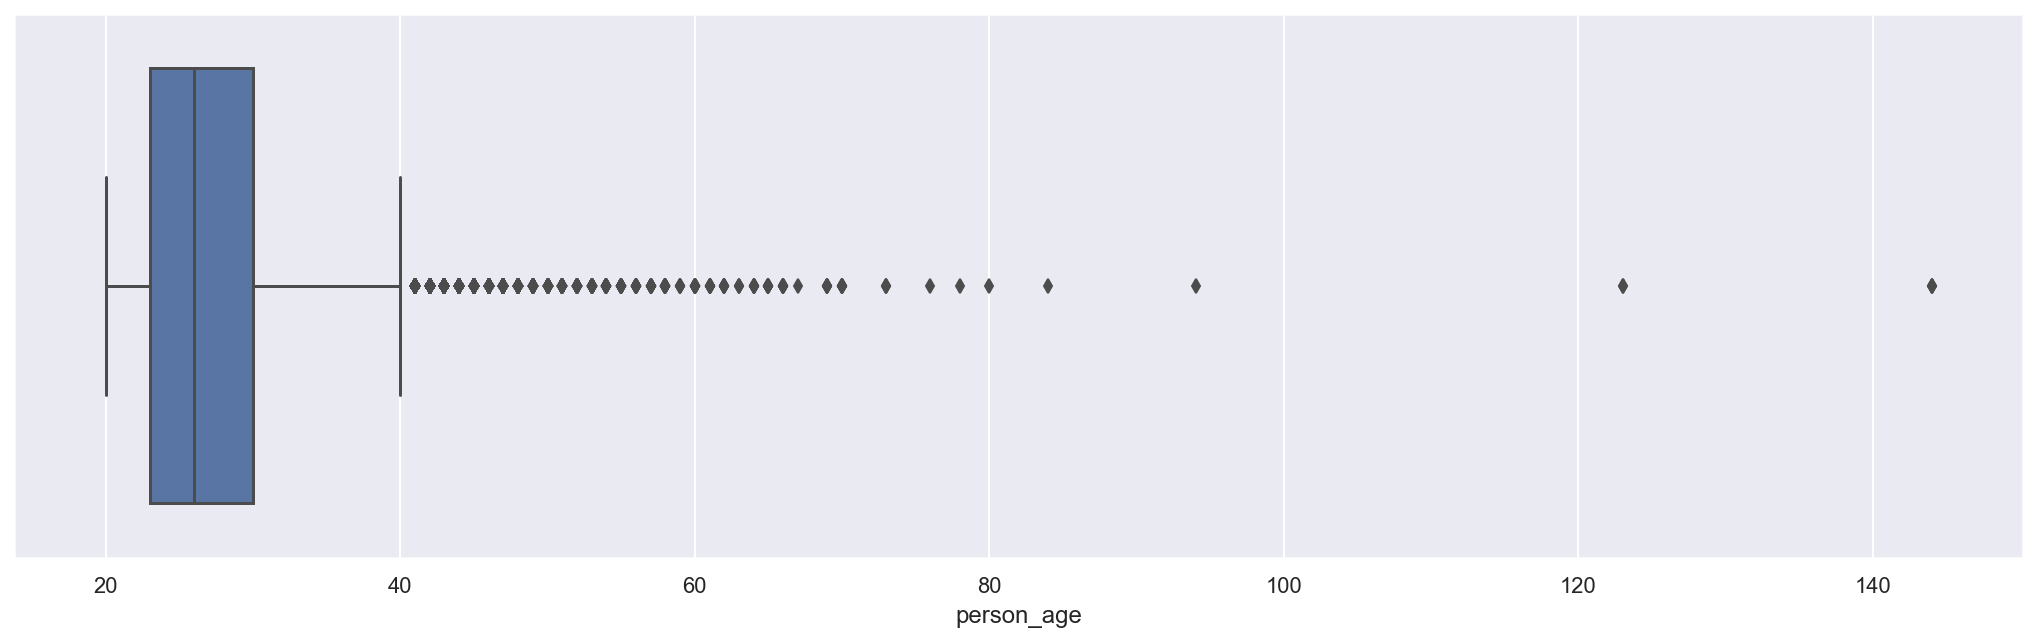

In [69]:
# Uni - Variate Outliers


# Method - III ( Uni - Variate Box - Plot)

sns.set(rc = {"figure.figsize" : (18,5)})

sns.boxplot(df_num["person_age"])


# Code for multiple box - plots in single frame


# num_col_list = df_num[:]
# sns.boxplot(x = "variable", y = "value", data = df_num.melt(value_vars=num_col_list))

<AxesSubplot:xlabel='person_income'>

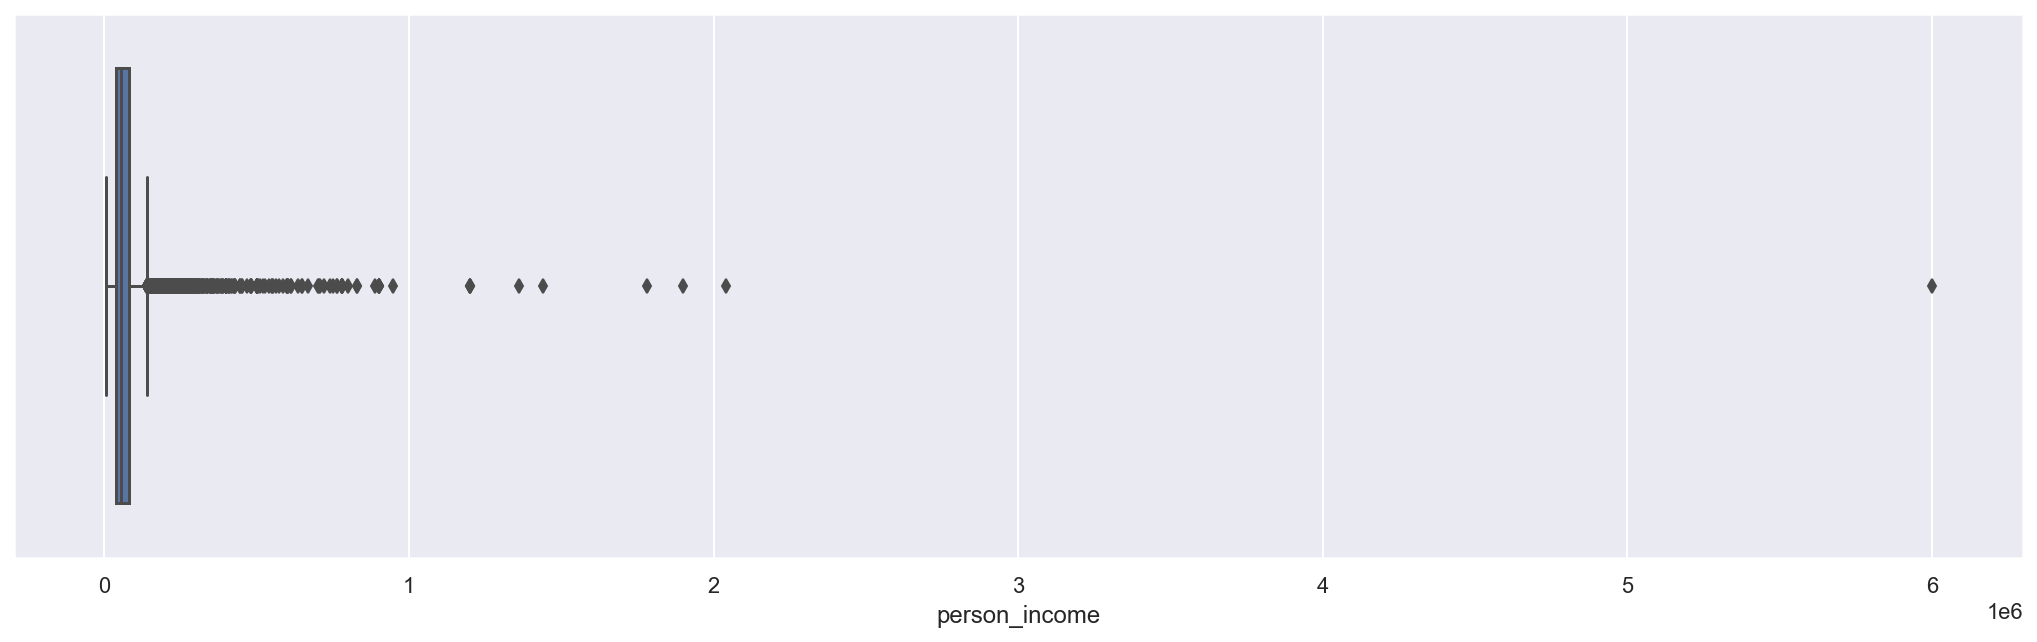

In [70]:
# Uni - Variate Outliers


# Method - III ( Uni - Variate Box - Plot)

sns.boxplot(df_num["person_income"])

<AxesSubplot:xlabel='person_emp_length'>

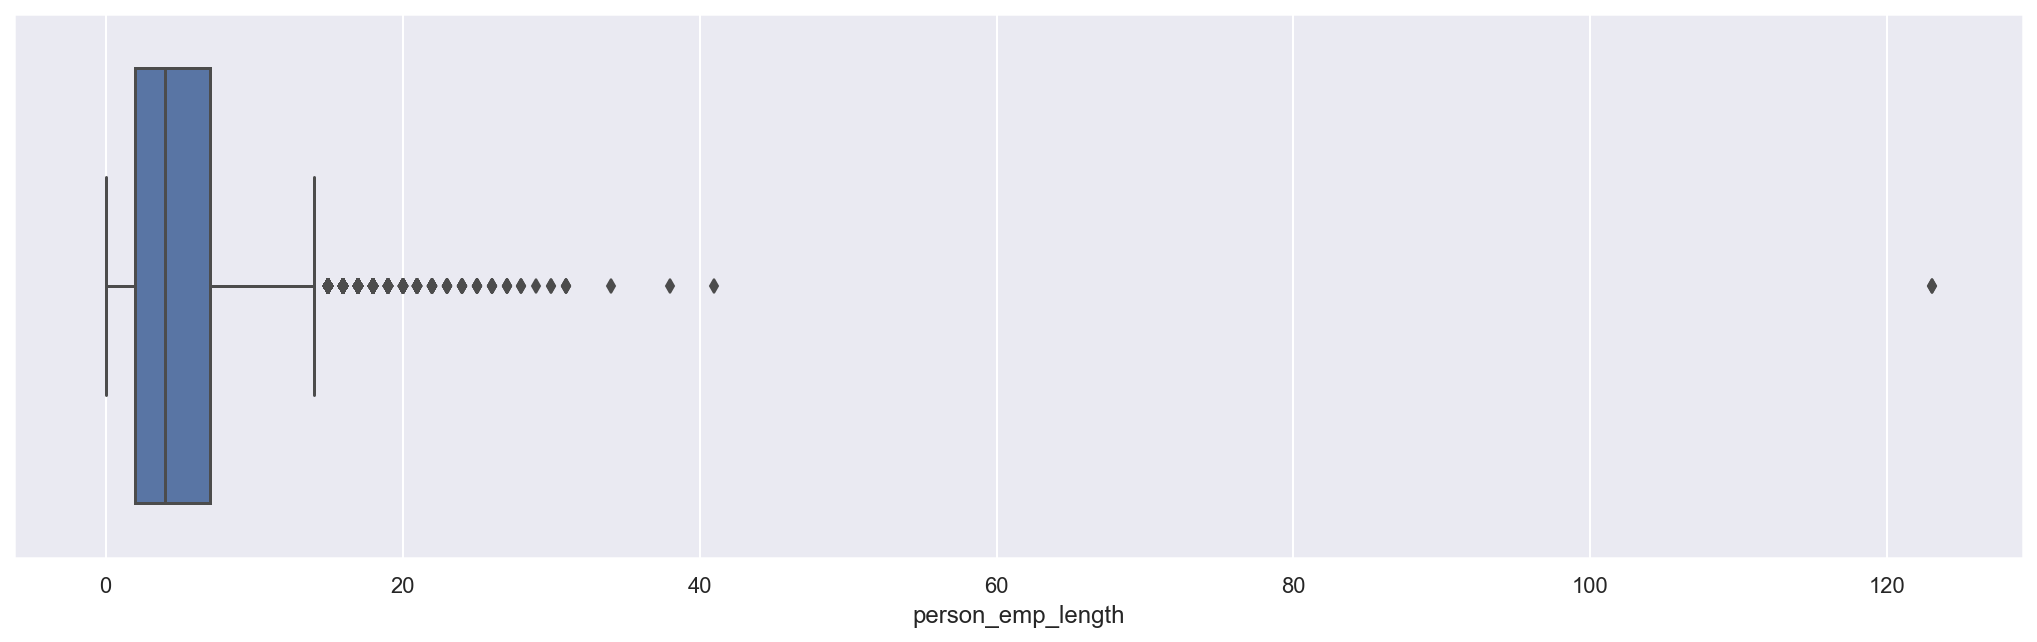

In [71]:
# Uni - Variate Outliers


# Method - III ( Uni - Variate Box - Plot)


sns.boxplot(df_num["person_emp_length"])

<AxesSubplot:xlabel='loan_amnt'>

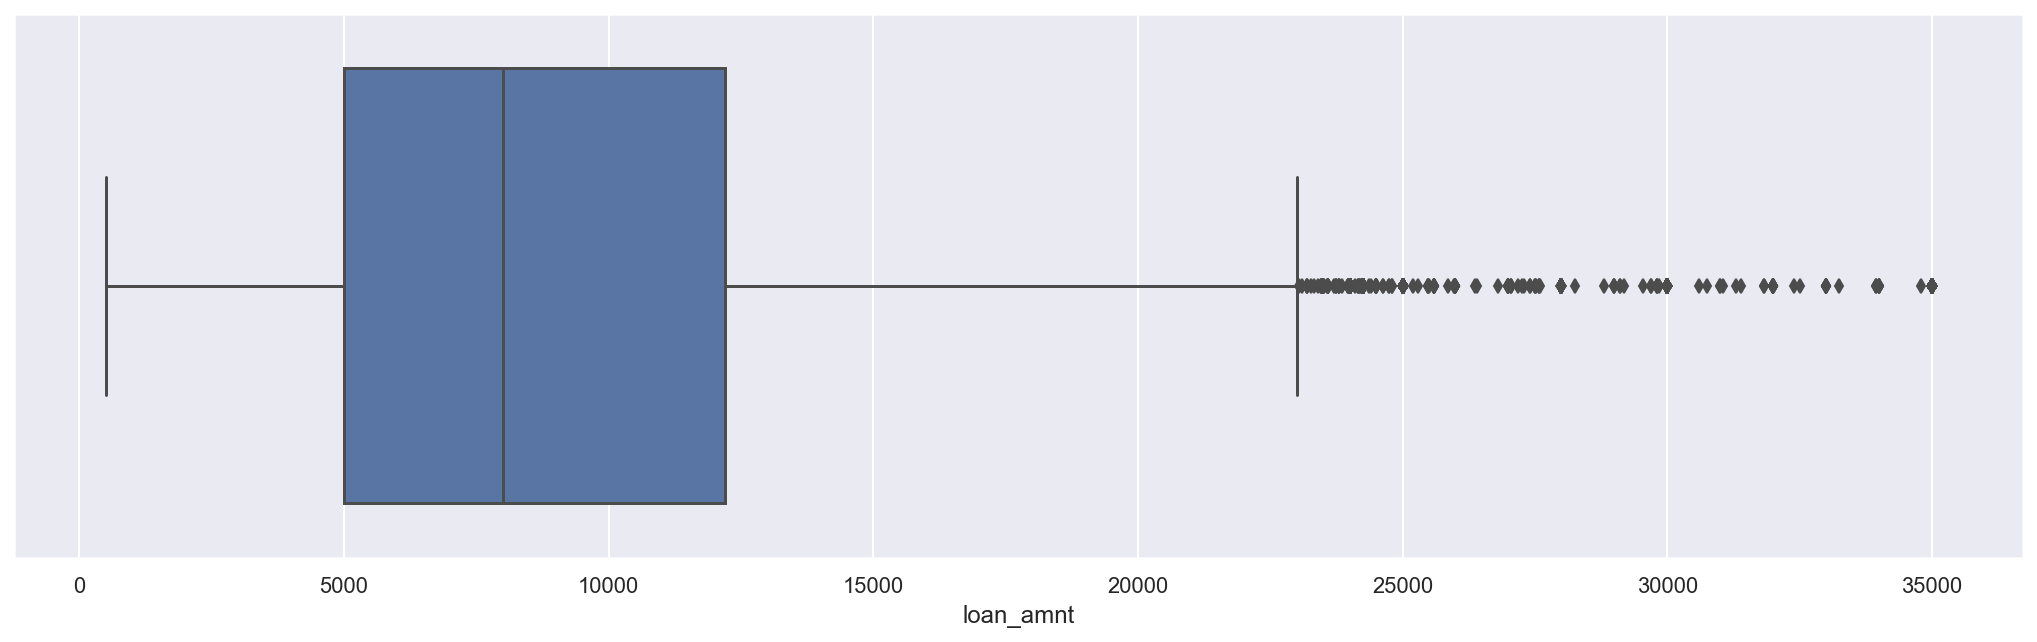

In [72]:
# Uni - Variate Outliers


# Method - III ( Uni - Variate Box - Plot)

sns.boxplot(df_num["loan_amnt"])

<AxesSubplot:xlabel='loan_int_rate'>

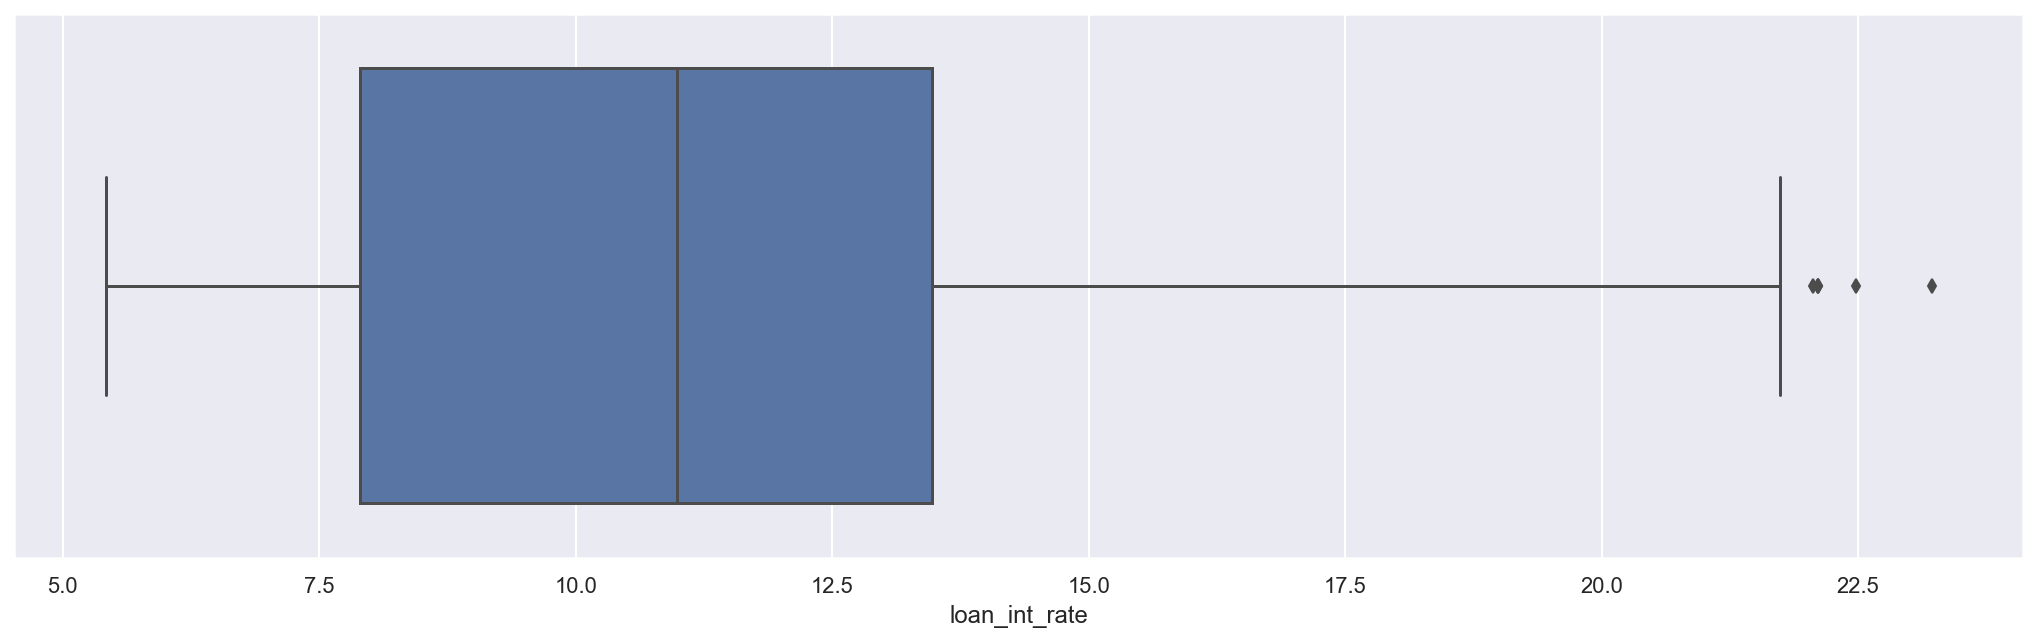

In [73]:
# Uni - Variate Outliers


# Method - III ( Uni - Variate Box - Plot)


sns.boxplot(df_num["loan_int_rate"])

<AxesSubplot:xlabel='loan_percent_income'>

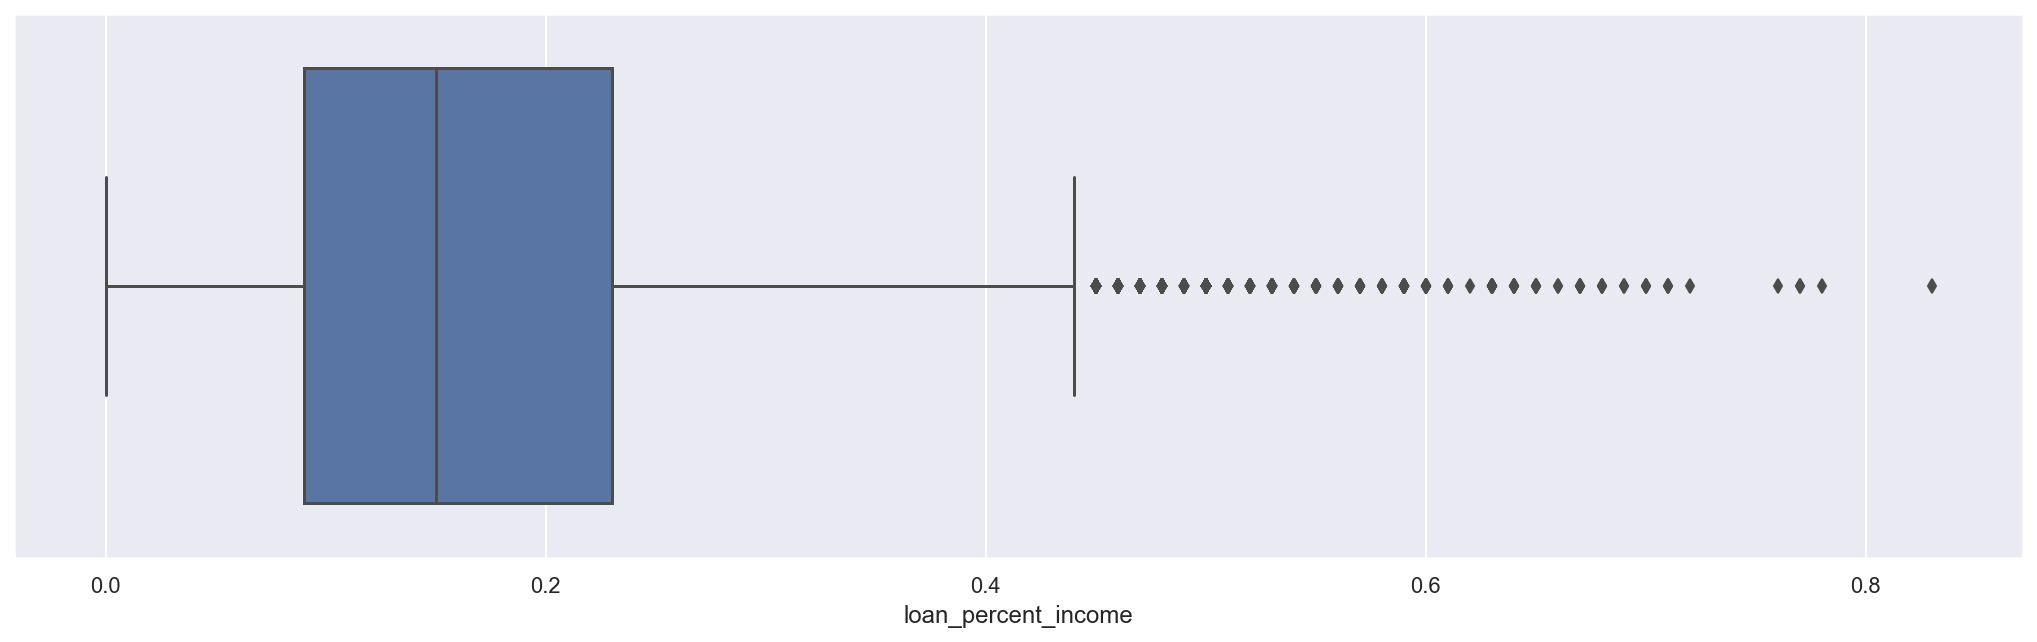

In [74]:
# Uni - Variate Outliers


# Method - III ( Uni - Variate Box - Plot)

sns.boxplot(df_num["loan_percent_income"])

<AxesSubplot:xlabel='cb_person_cred_hist_length'>

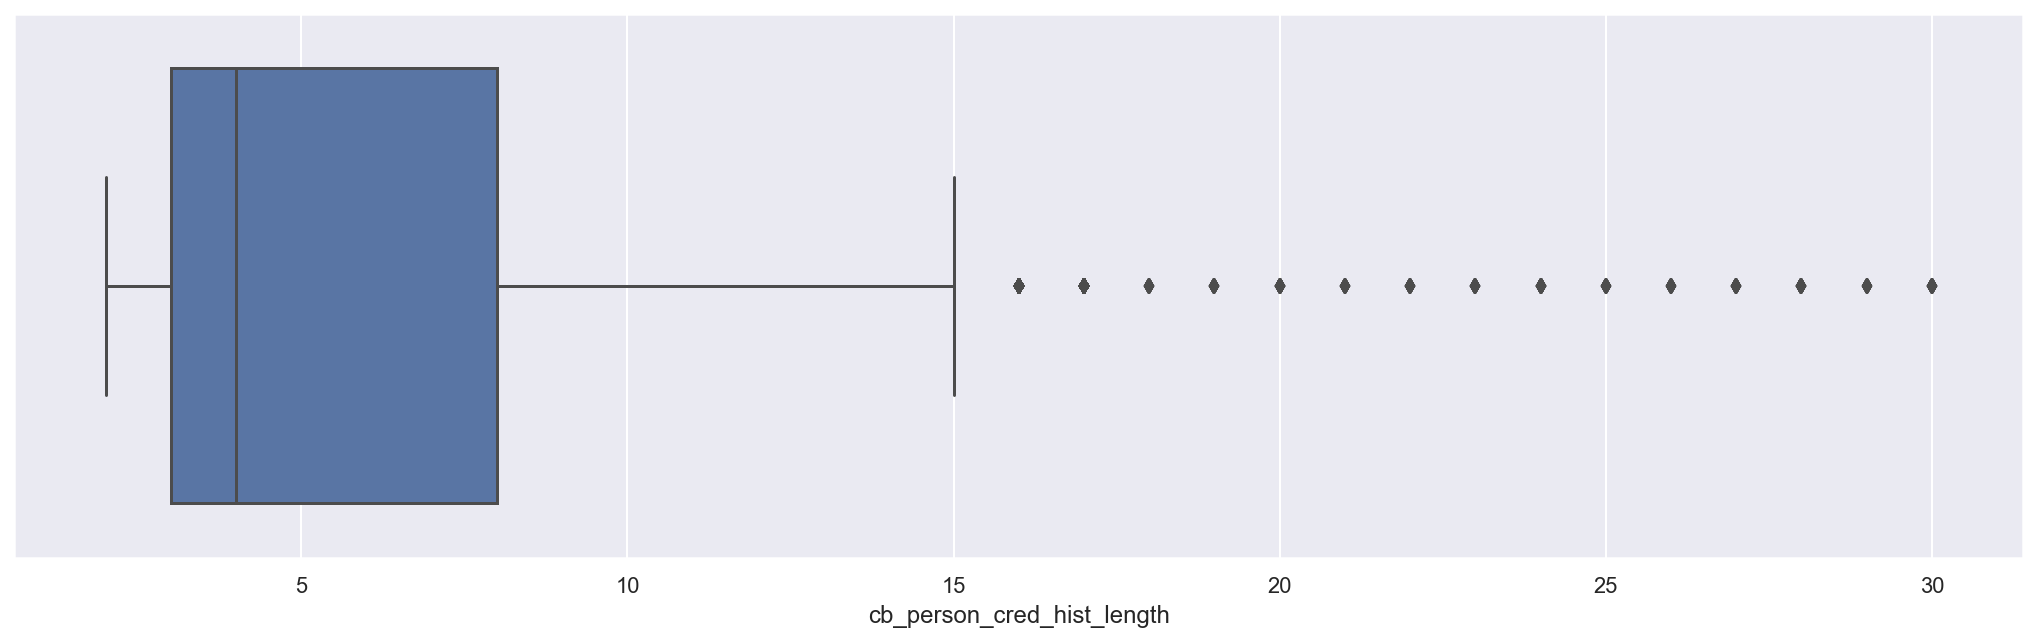

In [75]:
# Uni - Variate Outliers


# Method - III ( Uni - Variate Box - Plot)


sns.boxplot(df_num["cb_person_cred_hist_length"])

### Bi - Variate Outliers

1. Scatter Plots (Numerical - Numerical)

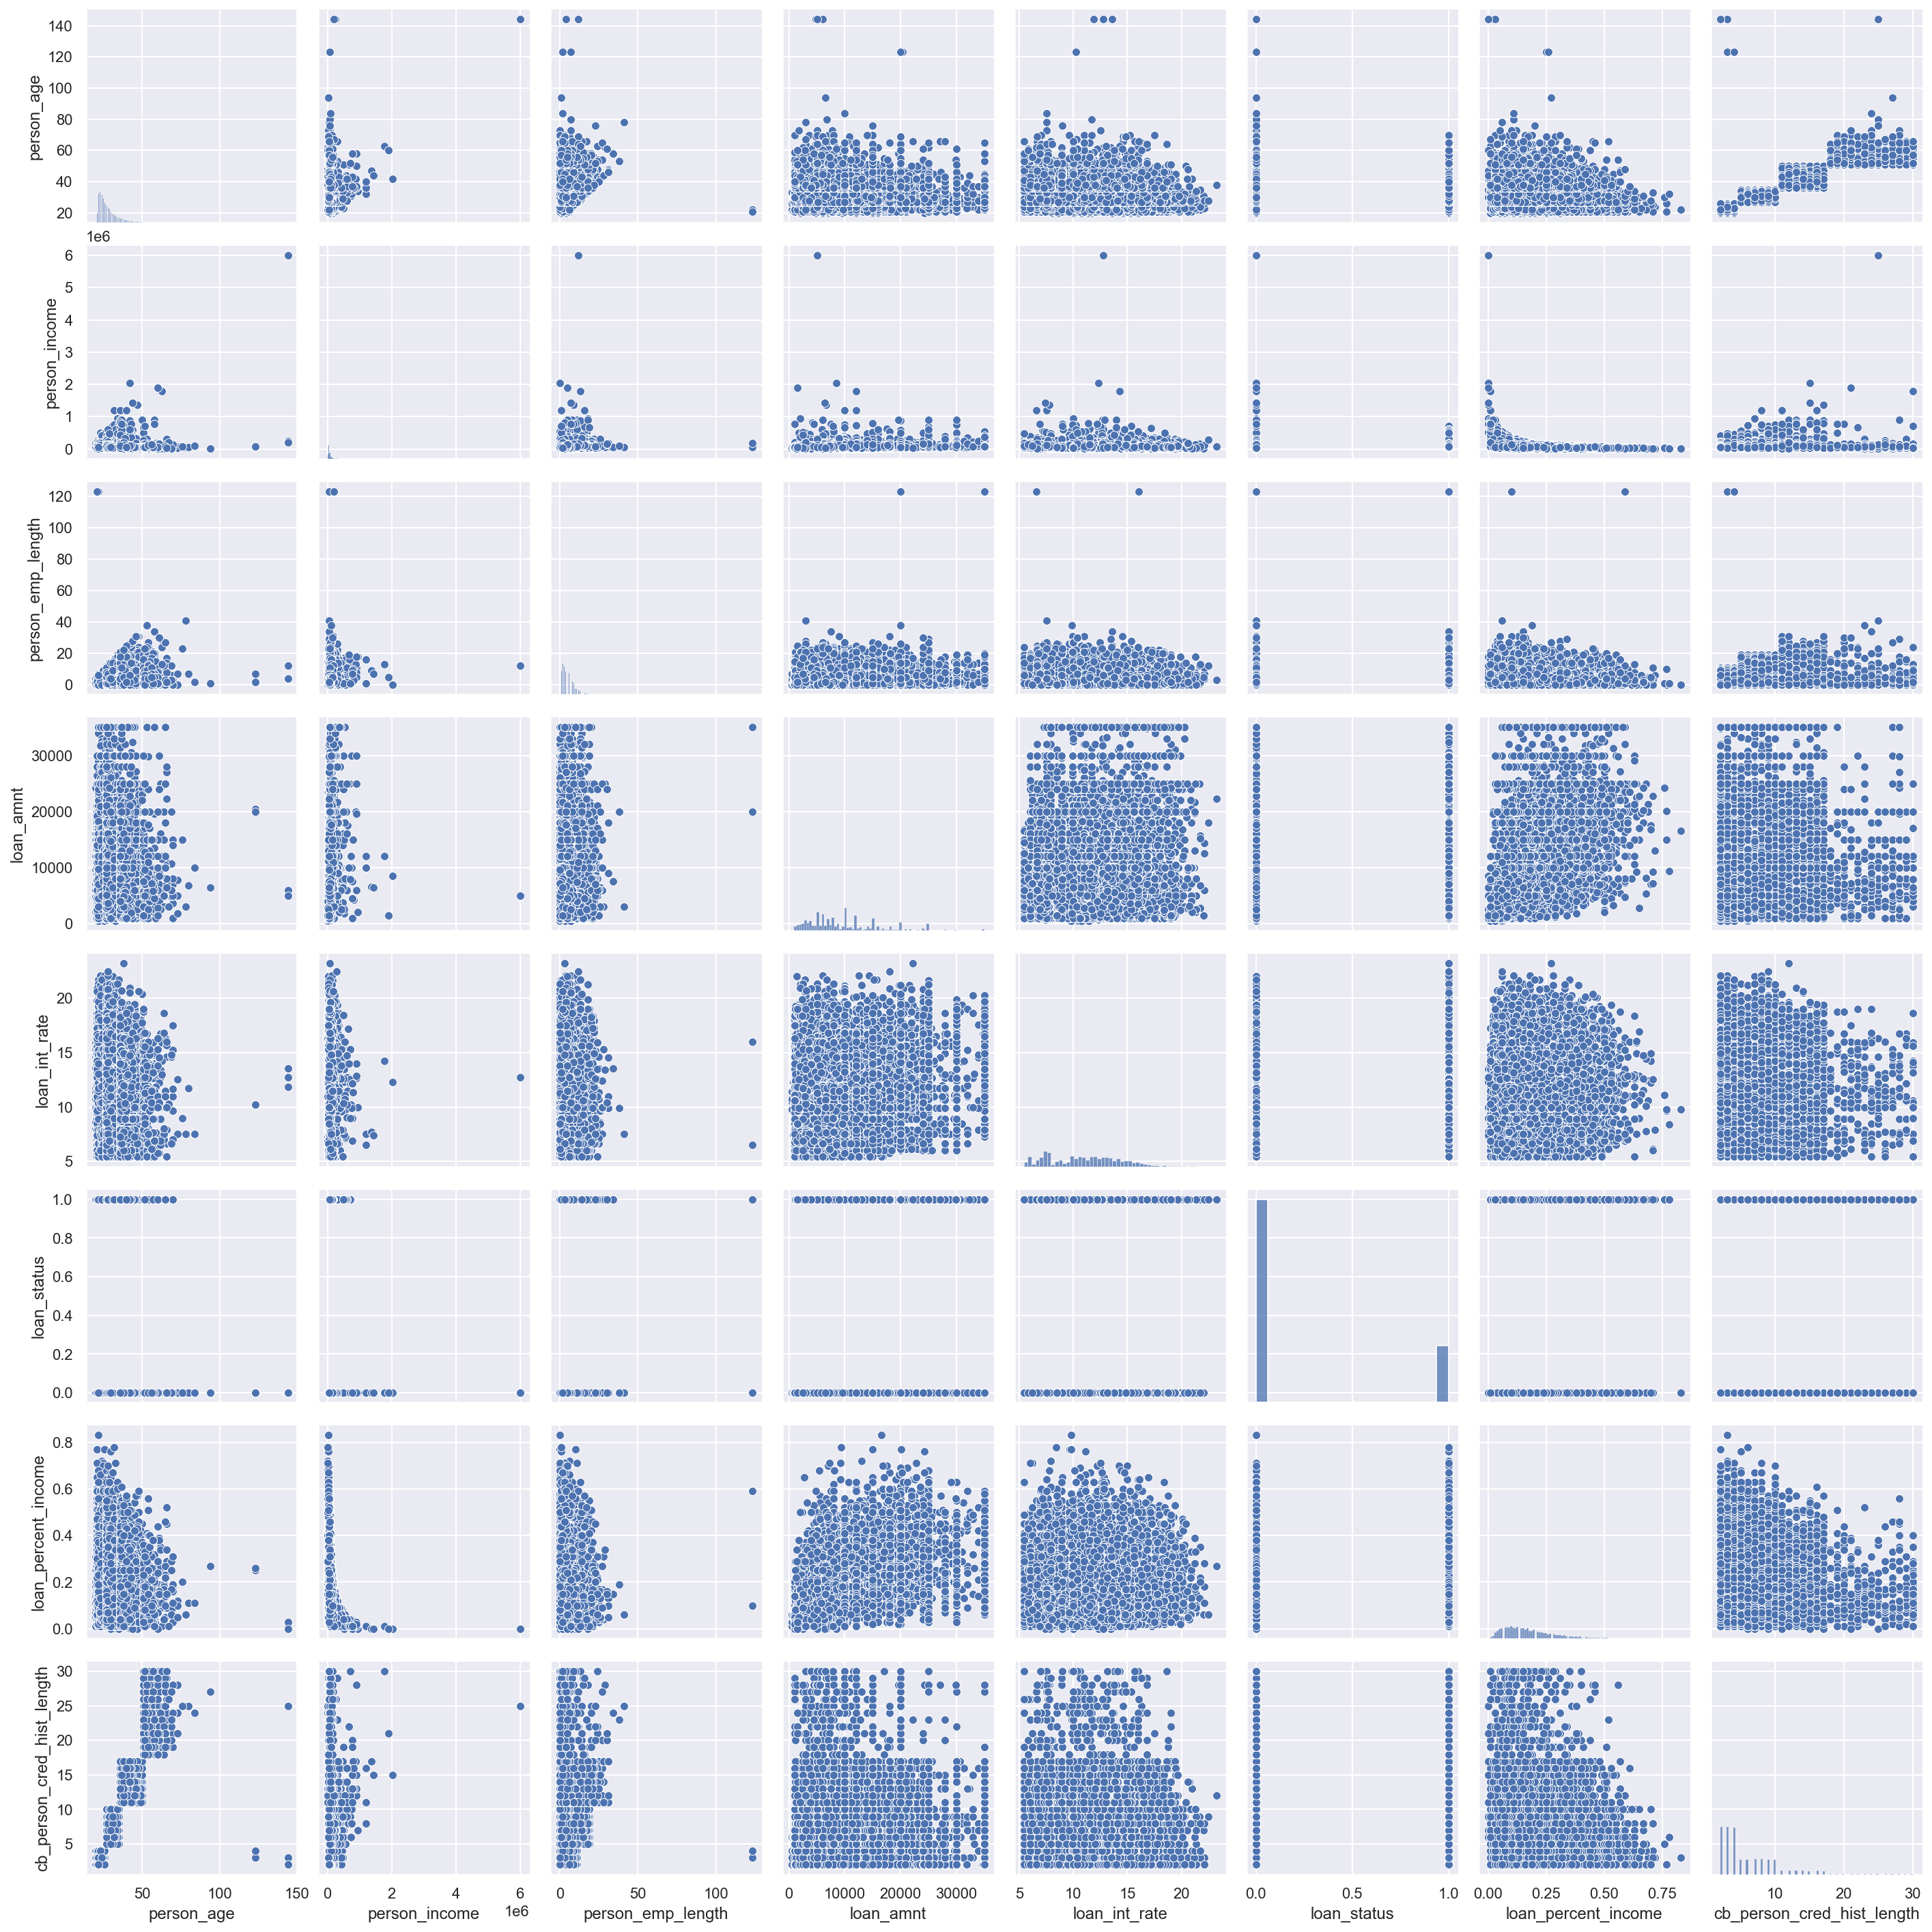

In [76]:
# Bi - Variate Outliers

# Method - I (Scatter Plot)

sns.pairplot(df_num)

## 14. Bi - Variate & Multi - Variate Analysis

#### Bi - Variate

1. Categorical - Categorical
2. Numerical - Numerical
3. Numerical - Categorical

#### Multi - Variate

1. Numerical - Categorical - Categorical
2. Numerical - Categorical - Numerical

### Bi - Variate -  (Categorical - Categorical)

1. Target - person_home_ownership
2. Target - loan_intent
3. Target - loan_grade
4. Target - cb_person_default_on_file
5. pd.crosstab() ---> working with categorical data
6. HeatMap of cross - tab

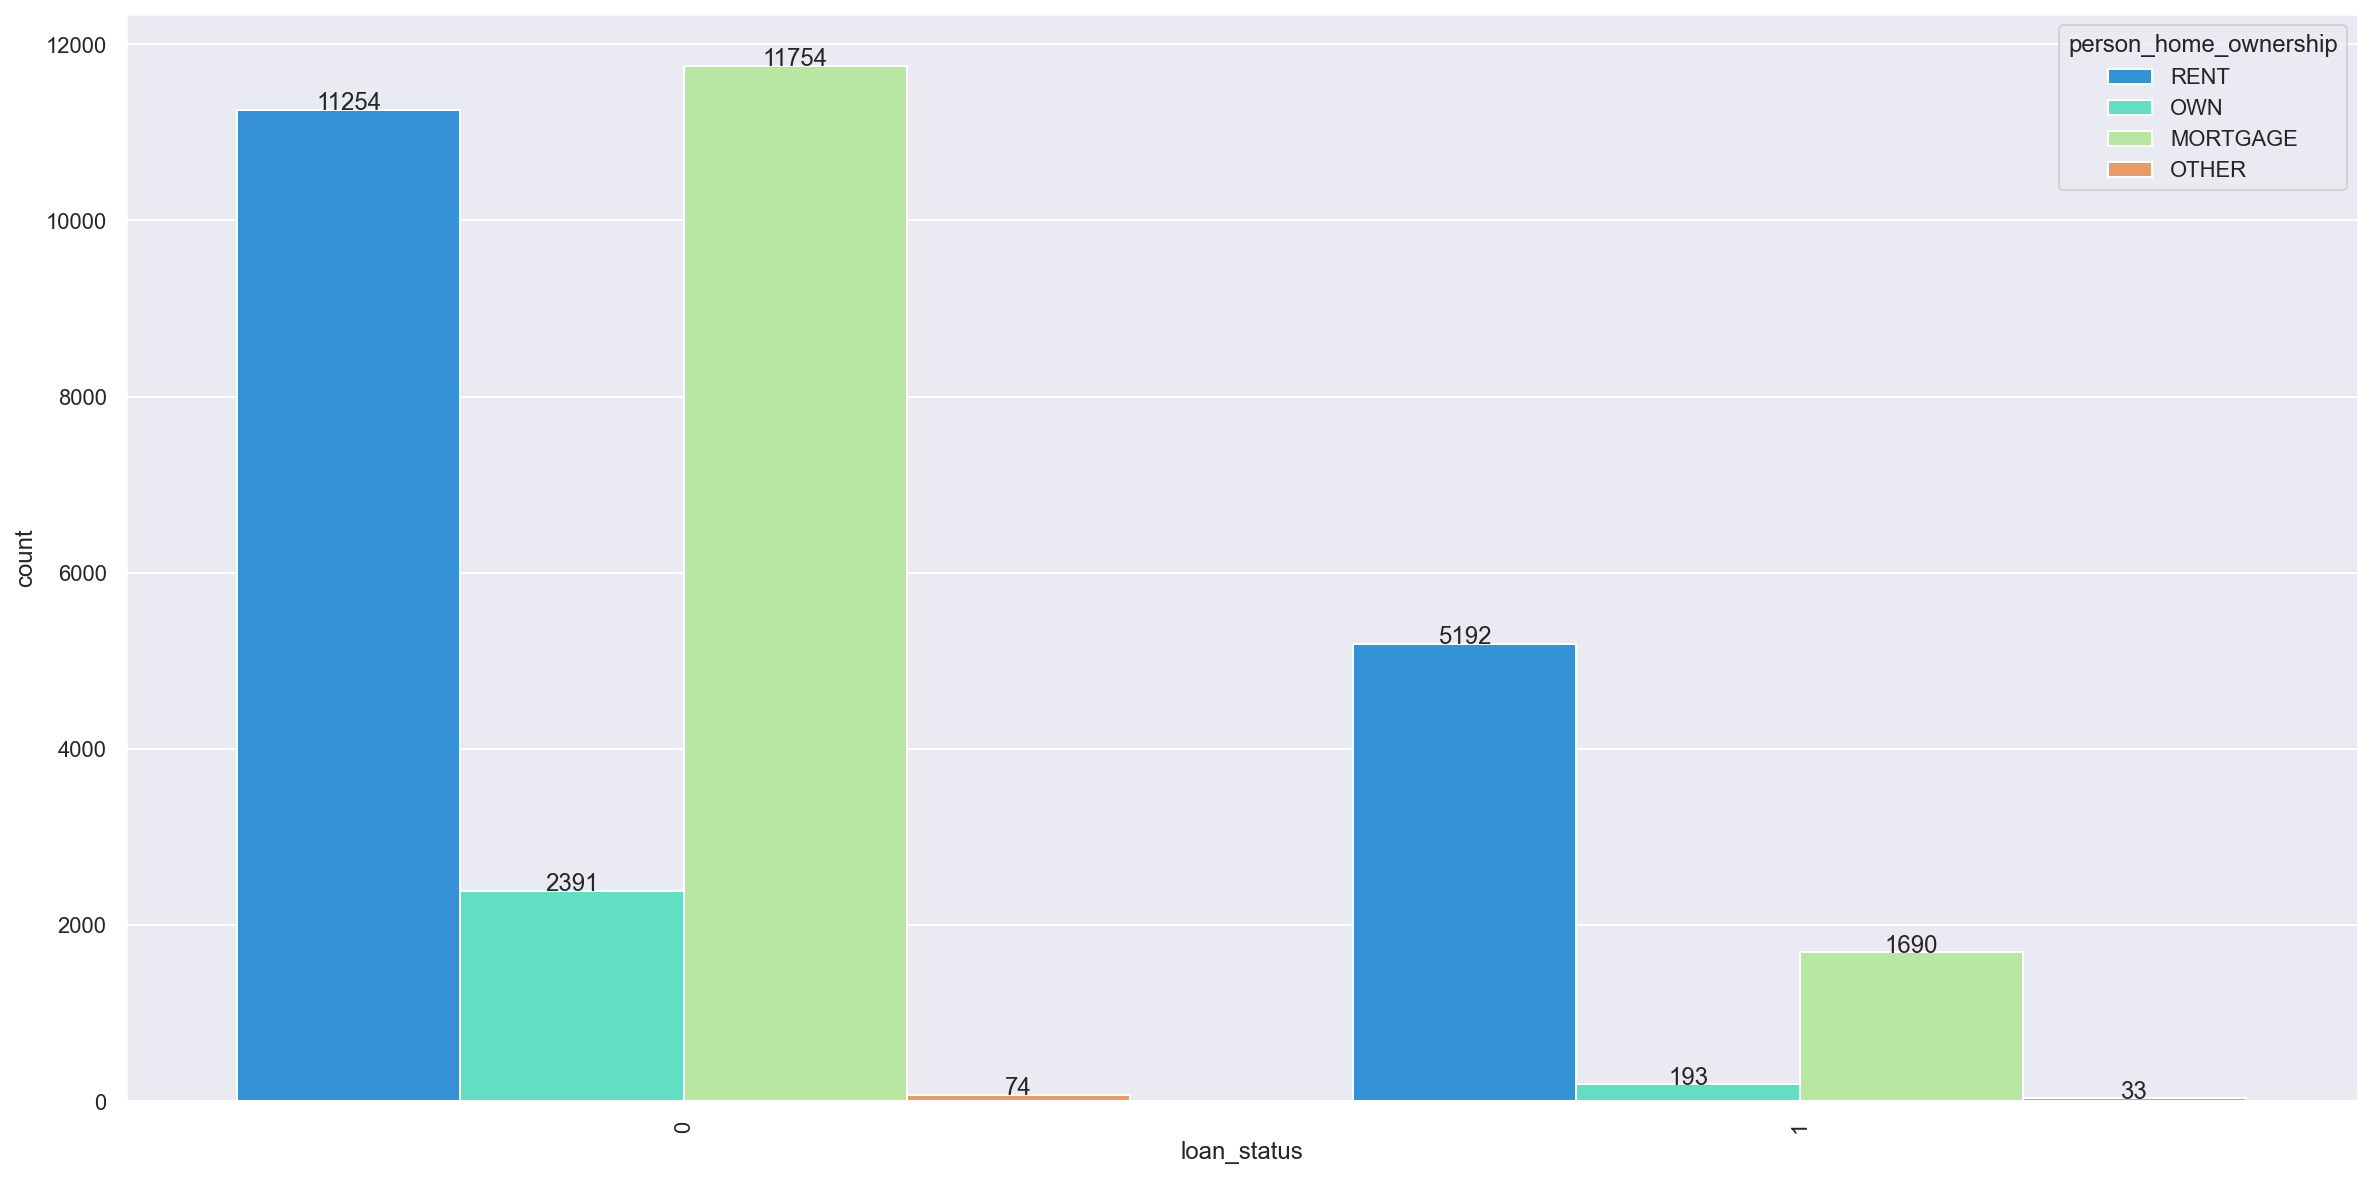

In [77]:
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1,x='loan_status',hue="person_home_ownership",data=df, palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
    

# Note 

# 1. Categorical - Categorical ---> Target - loan_status 
#                              ---> Predictor - person_home_ownership

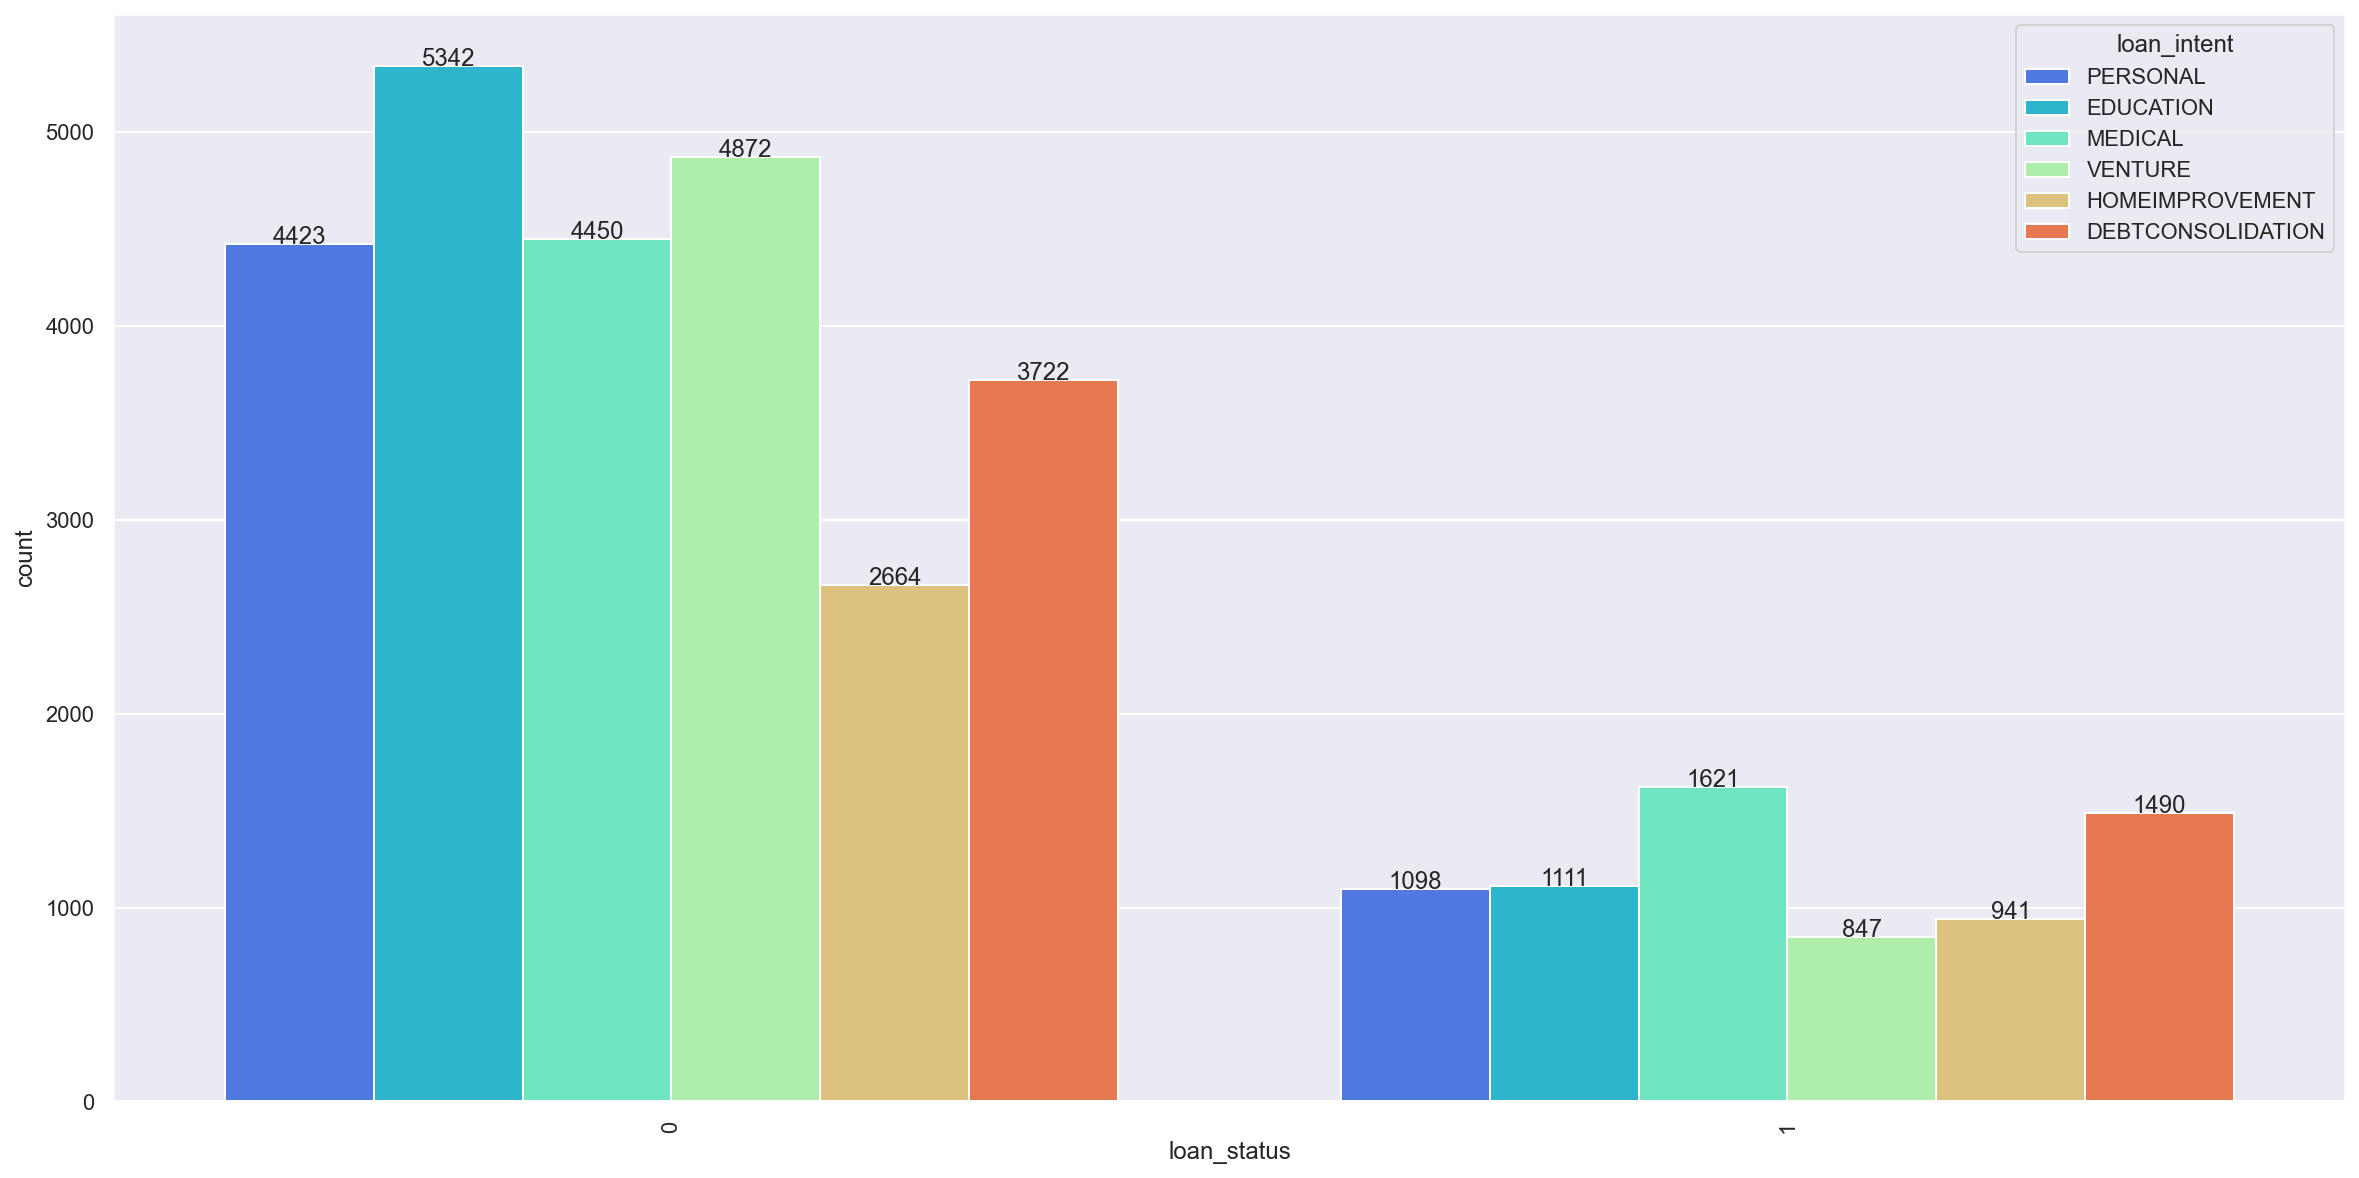

In [78]:
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1,x='loan_status',hue="loan_intent",data=df, palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
    

# Note 

# 1. Categorical - Categorical ---> Target - loan_status
#                              ---> Predictor - loan_intent

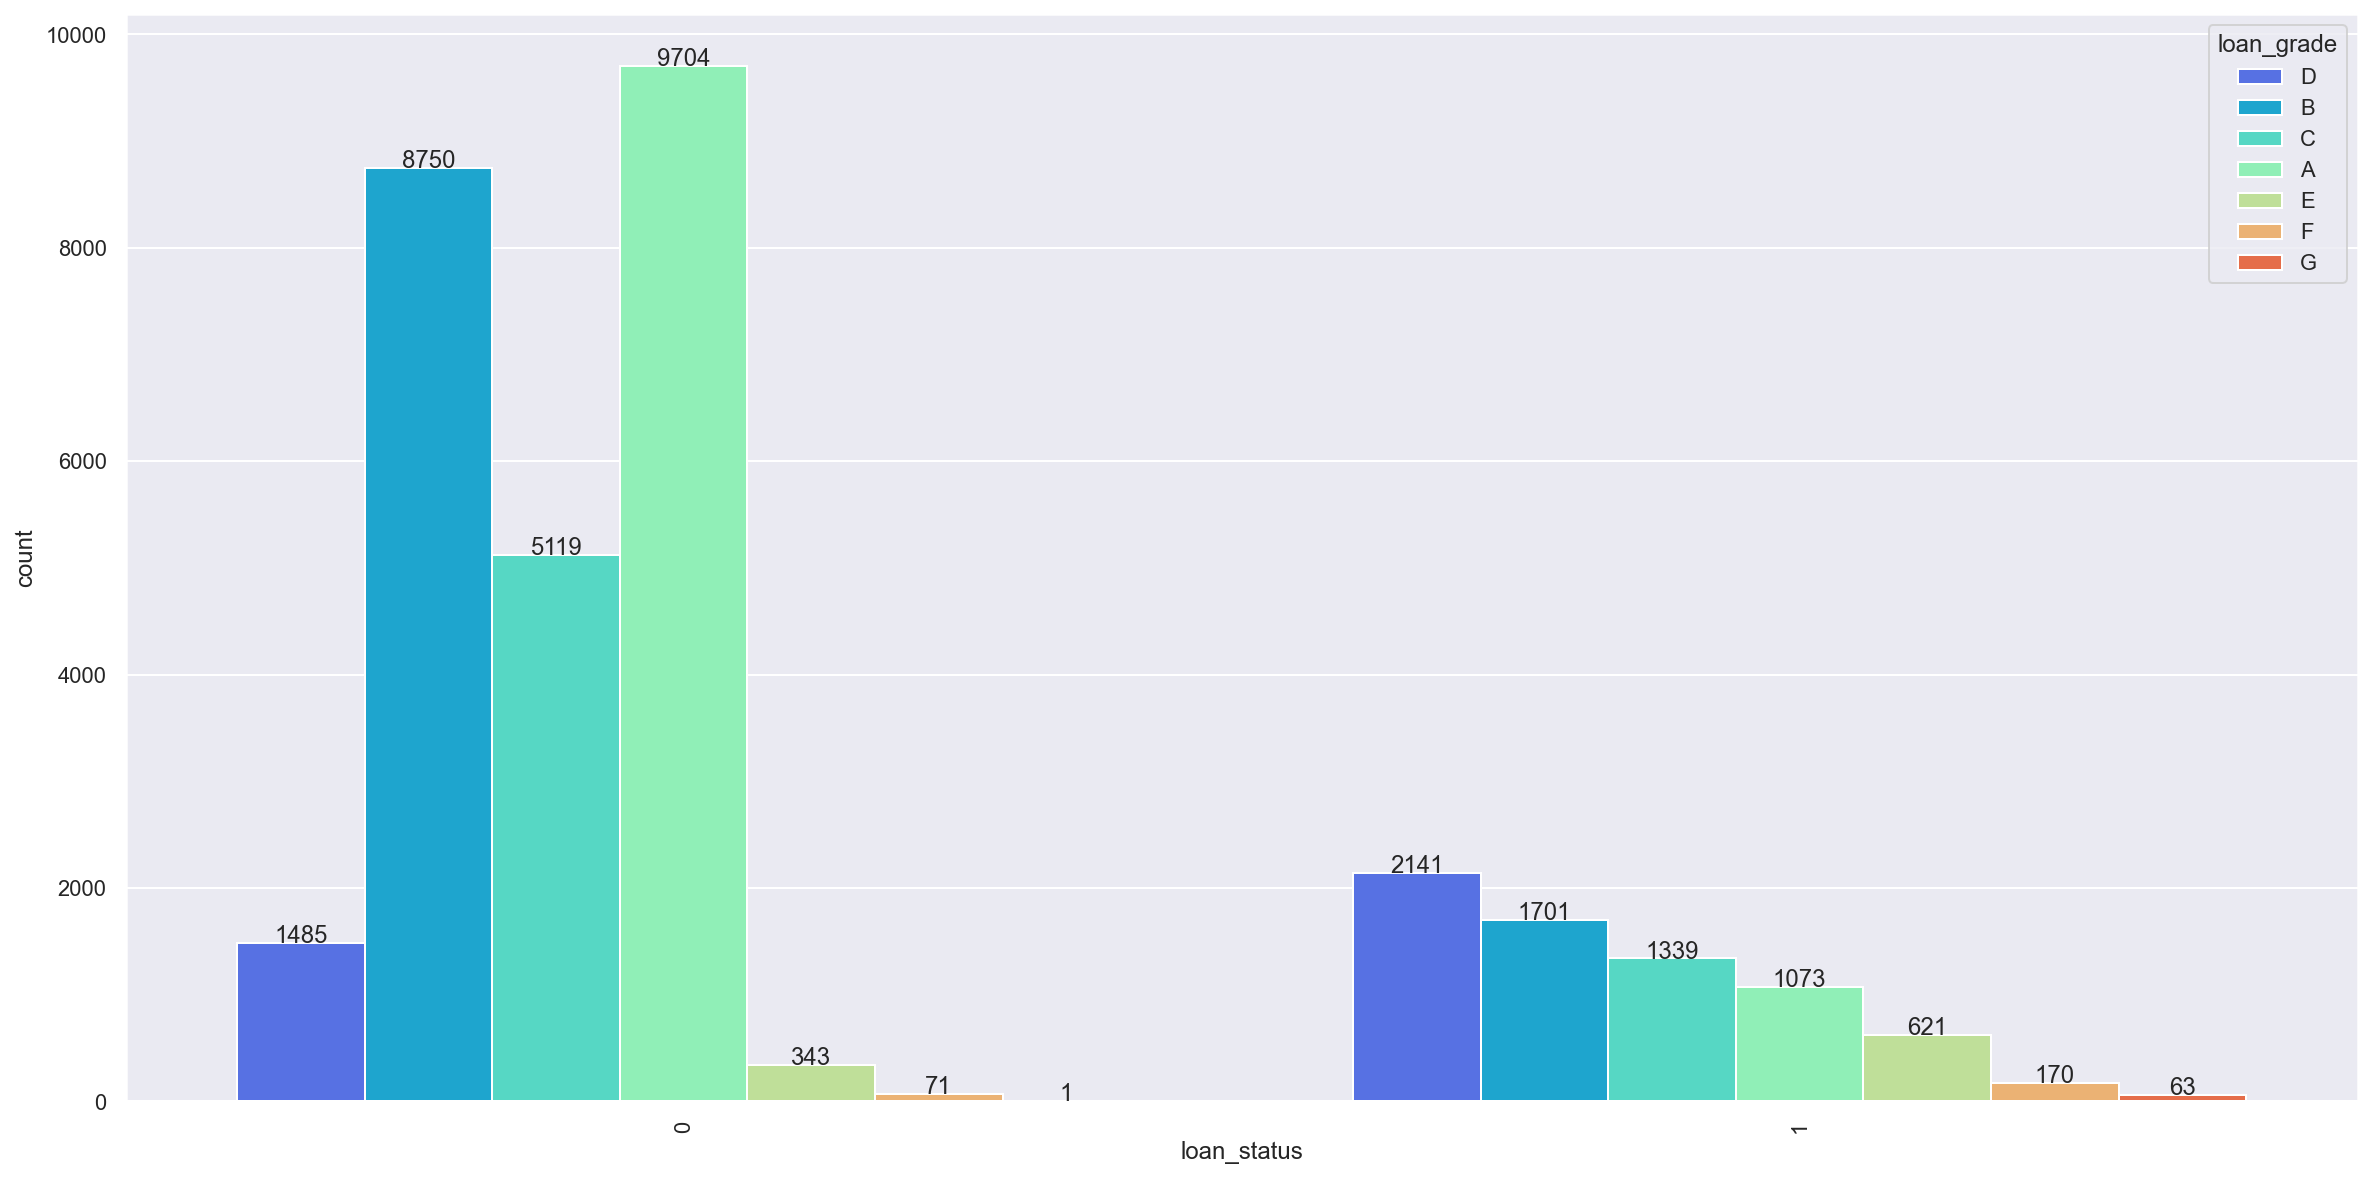

In [79]:
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1,x='loan_status',hue="loan_grade",data=df, palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")


# Note 

# 1. Categorical - Categorical ---> Target - loan_status 
#                              ---> Predictor - loan_grade

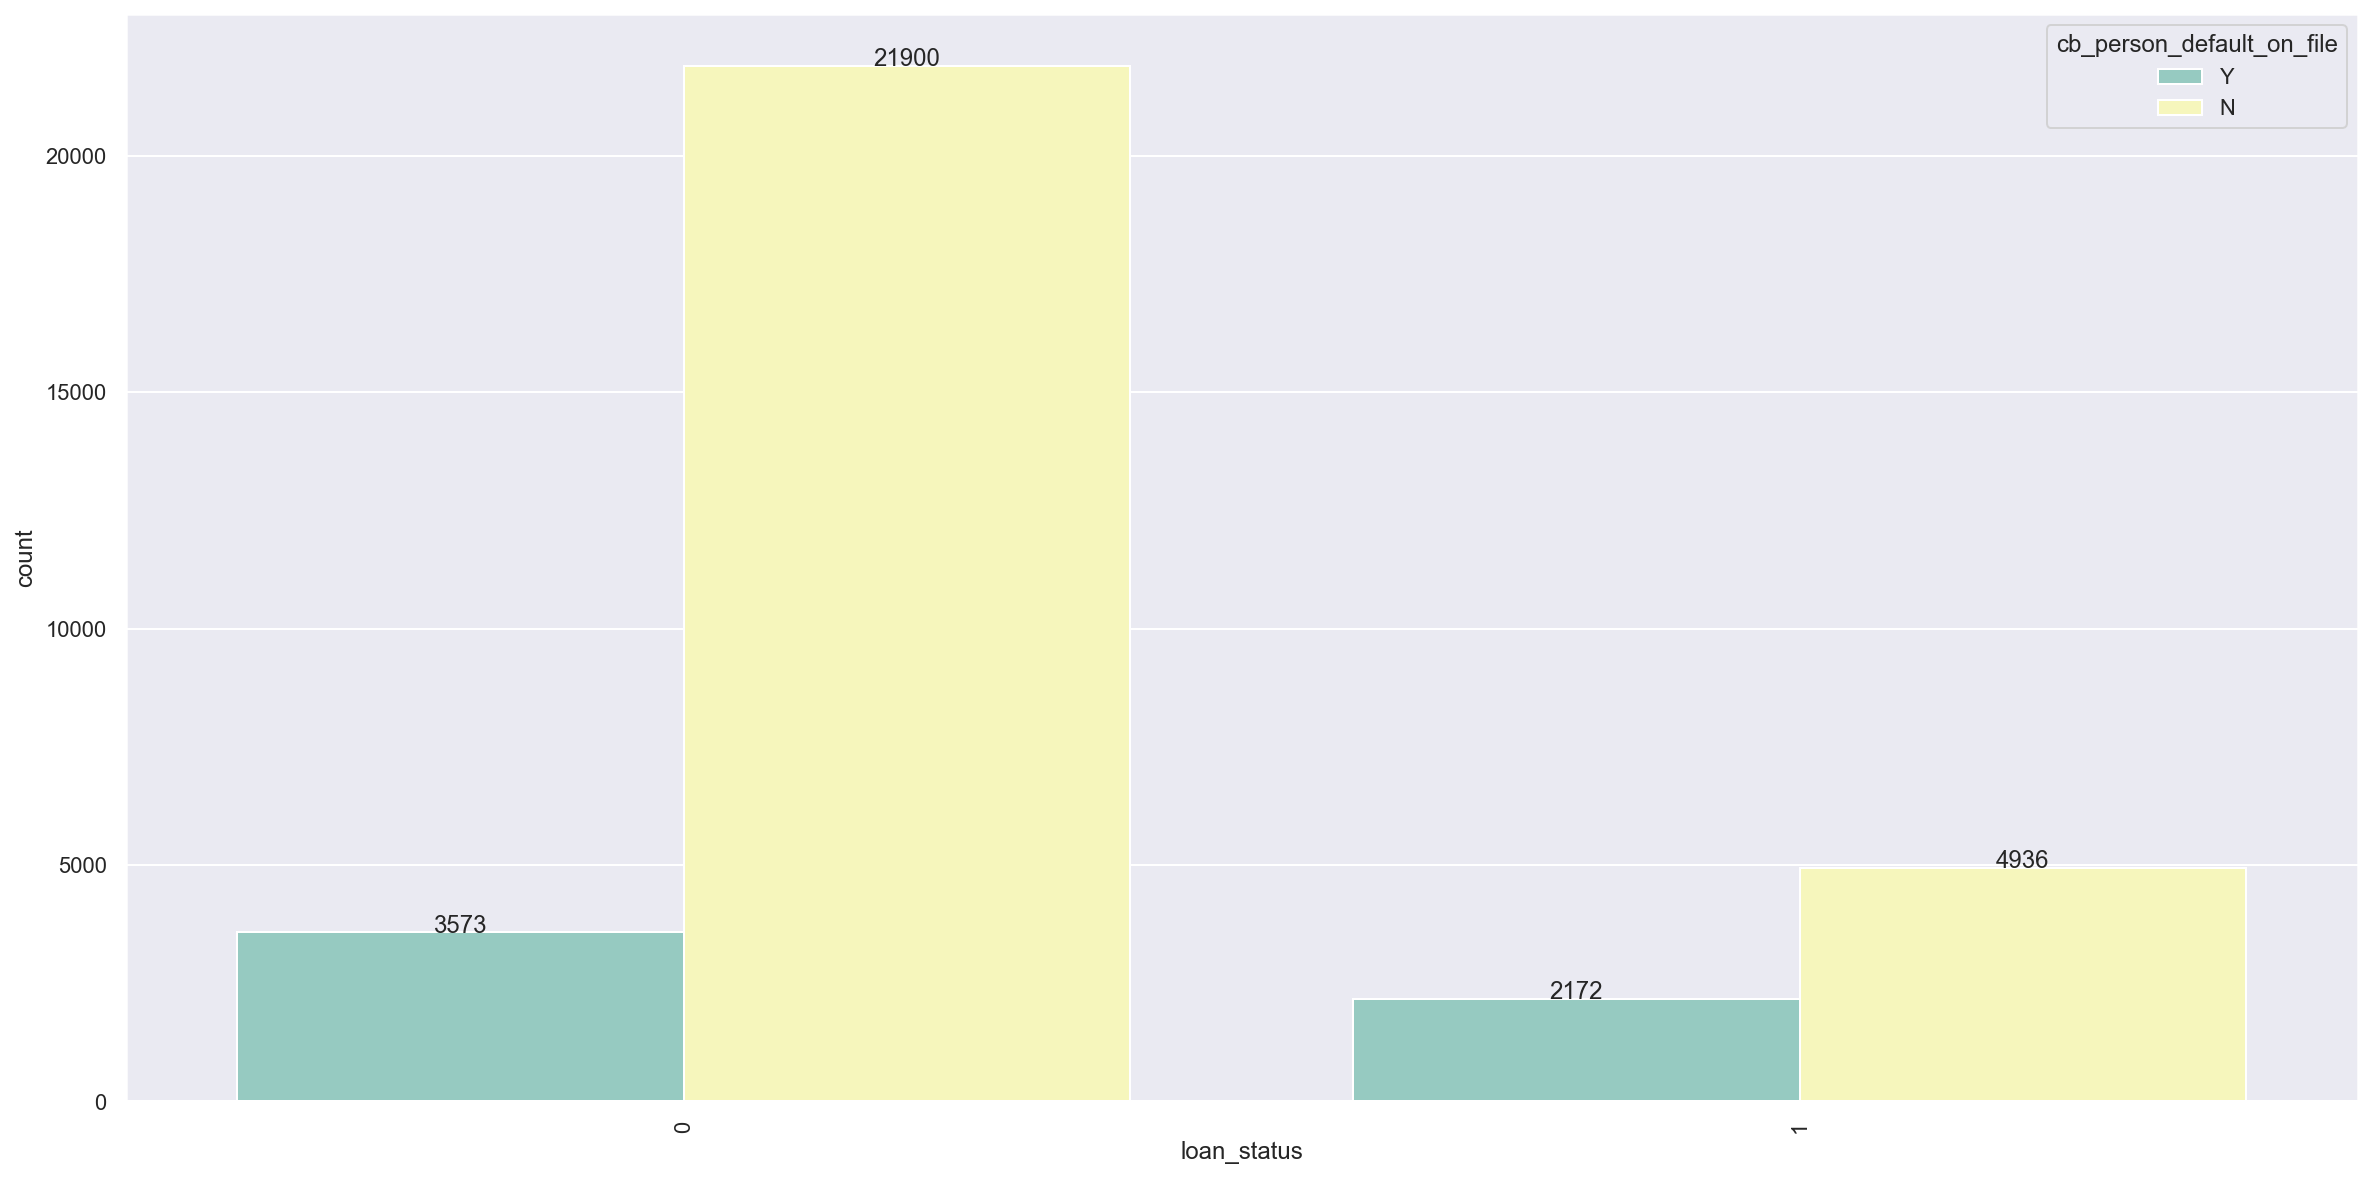

In [80]:
# Bi - Variate - Categorical - Categorical

fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1,x='loan_status',hue="cb_person_default_on_file",data=df, palette="Set3" )
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
    
    
# Note 

# 1. Categorical - Categorical ---> Target - loan_status 
#                              ---> Predictor - cb_person_default_on_file

In [81]:
# Extracting the top 10 ratios

df_num["loan_percent_income"].nlargest(10)  # ---> Top 10 in terms of values.
  
df_num["loan_percent_income"][:10]    # ---> Top 10 in terms of frequencies.

0    0.59
1    0.10
2    0.57
3    0.53
4    0.55
5    0.25
6    0.45
7    0.44
8    0.42
9    0.16
Name: loan_percent_income, dtype: float64

<AxesSubplot:>

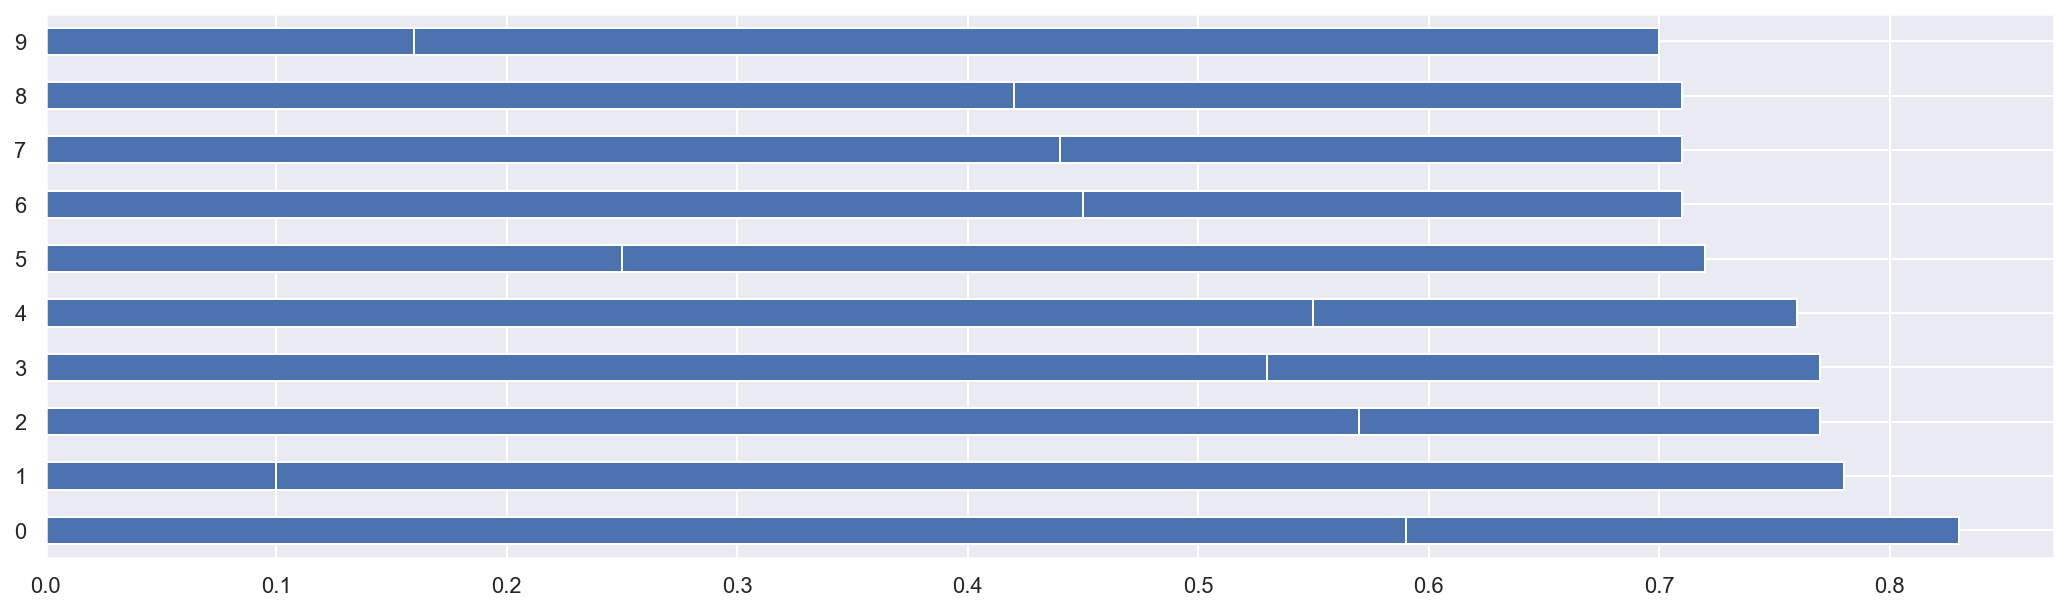

In [85]:
# Plotting the loan - to - Income ratio

df_num["loan_percent_income"].nlargest(10).plot(kind ='barh')   #  ---> Top 10 in terms of values.

df_num["loan_percent_income"][:10].plot(kind ='barh')     # ---> Top 10 in terms of frequencies.

In [87]:
cross_dei = pd.crosstab(index = df['loan_status'], columns = df['loan_percent_income'], normalize='columns').round(4) * 100

cross_dei

loan_percent_income   0.00   0.01   0.02   0.03  0.04   0.05   0.06   0.07  \
loan_status                                                                  
0                    100.0  94.24  91.08  90.38  87.7  90.07  88.98  88.31   
1                      0.0   5.76   8.92   9.62  12.3   9.93  11.02  11.69   

loan_percent_income   0.08   0.09  ...   0.67   0.68  0.69   0.70   0.71  \
loan_status                        ...                                     
0                    85.66  87.74  ...    0.0  33.33  50.0  33.33  33.33   
1                    14.34  12.26  ...  100.0  66.67  50.0  66.67  66.67   

loan_percent_income   0.72   0.76   0.77   0.78   0.83  
loan_status                                             
0                      0.0    0.0    0.0    0.0  100.0  
1                    100.0  100.0  100.0  100.0    0.0  

[2 rows x 77 columns]

In [43]:
# Bi - Variate - Categorical - Categorical

# Cross - tabulation in Absolute form

pd.crosstab(index = df_cat['loan_intent'], columns = df_cat['loan_grade'])


# Cross - tabulation in Relative form - 
#                                     - row - wise
#                                     - columns - wise
#                                     - df - wise


# row - wise cross - tabulation

cross_index = pd.crosstab(index = df_cat['loan_intent'], columns = df_cat['loan_grade'], 
            normalize='index').round(4) * 100

cross_index

loan_grade             A      B      C      D     E     F     G
loan_intent                                                    
DEBTCONSOLIDATION  33.63  31.08  19.99  11.51  2.76  0.83  0.19
EDUCATION          33.69  31.40  21.01  10.18  2.87  0.71  0.14
HOMEIMPROVEMENT    31.23  30.93  19.22  13.51  3.97  0.89  0.25
MEDICAL            32.27  33.04  20.05  10.84  2.75  0.86  0.20
PERSONAL           33.18  32.84  18.95  11.65  2.66  0.54  0.18
VENTURE            33.80  32.72  19.30  10.16  3.11  0.66  0.24

In [44]:
# Cross - tabulation in Relative form - percentage of all datapoints of df.


cross_df = pd.crosstab(index = df_cat['loan_intent'], columns = df_cat['loan_grade'], 
            margins = True, margins_name= "Total", normalize = True).round(4) * 100

cross_df

loan_grade             A      B      C      D     E     F     G   Total
loan_intent                                                            
DEBTCONSOLIDATION   5.38   4.97   3.20   1.84  0.44  0.13  0.03   16.00
EDUCATION           6.67   6.22   4.16   2.02  0.57  0.14  0.03   19.81
HOMEIMPROVEMENT     3.46   3.42   2.13   1.49  0.44  0.10  0.03   11.06
MEDICAL             6.01   6.16   3.74   2.02  0.51  0.16  0.04   18.63
PERSONAL            5.62   5.56   3.21   1.97  0.45  0.09  0.03   16.95
VENTURE             5.93   5.74   3.39   1.78  0.55  0.12  0.04   17.55
Total              33.08  32.08  19.82  11.13  2.96  0.74  0.20  100.00

In [45]:
cross_col = pd.crosstab(index = df_cat['loan_intent'], columns = df_num['loan_status'], 
            normalize='index').round(4) * 100

cross_col

loan_status            0      1
loan_intent                    
DEBTCONSOLIDATION  71.41  28.59
EDUCATION          82.78  17.22
HOMEIMPROVEMENT    73.90  26.10
MEDICAL            73.30  26.70
PERSONAL           80.11  19.89
VENTURE            85.19  14.81

In [46]:
cross_grade = pd.crosstab(index = df_cat['loan_grade'], columns = df_num['loan_status'], 
            normalize='index').round(4) * 100

cross_grade

loan_status      0      1
loan_grade               
A            90.04   9.96
B            83.72  16.28
C            79.27  20.73
D            40.95  59.05
E            35.58  64.42
F            29.46  70.54
G             1.56  98.44

In [47]:
# Bi - Variate Analysis Default History vis-a-vis

pd.crosstab(index = df_cat['cb_person_default_on_file'], columns = df_num['loan_status'], 
            normalize='index').round(4) * 100

loan_status                    0      1
cb_person_default_on_file              
N                          81.61  18.39
Y                          62.19  37.81

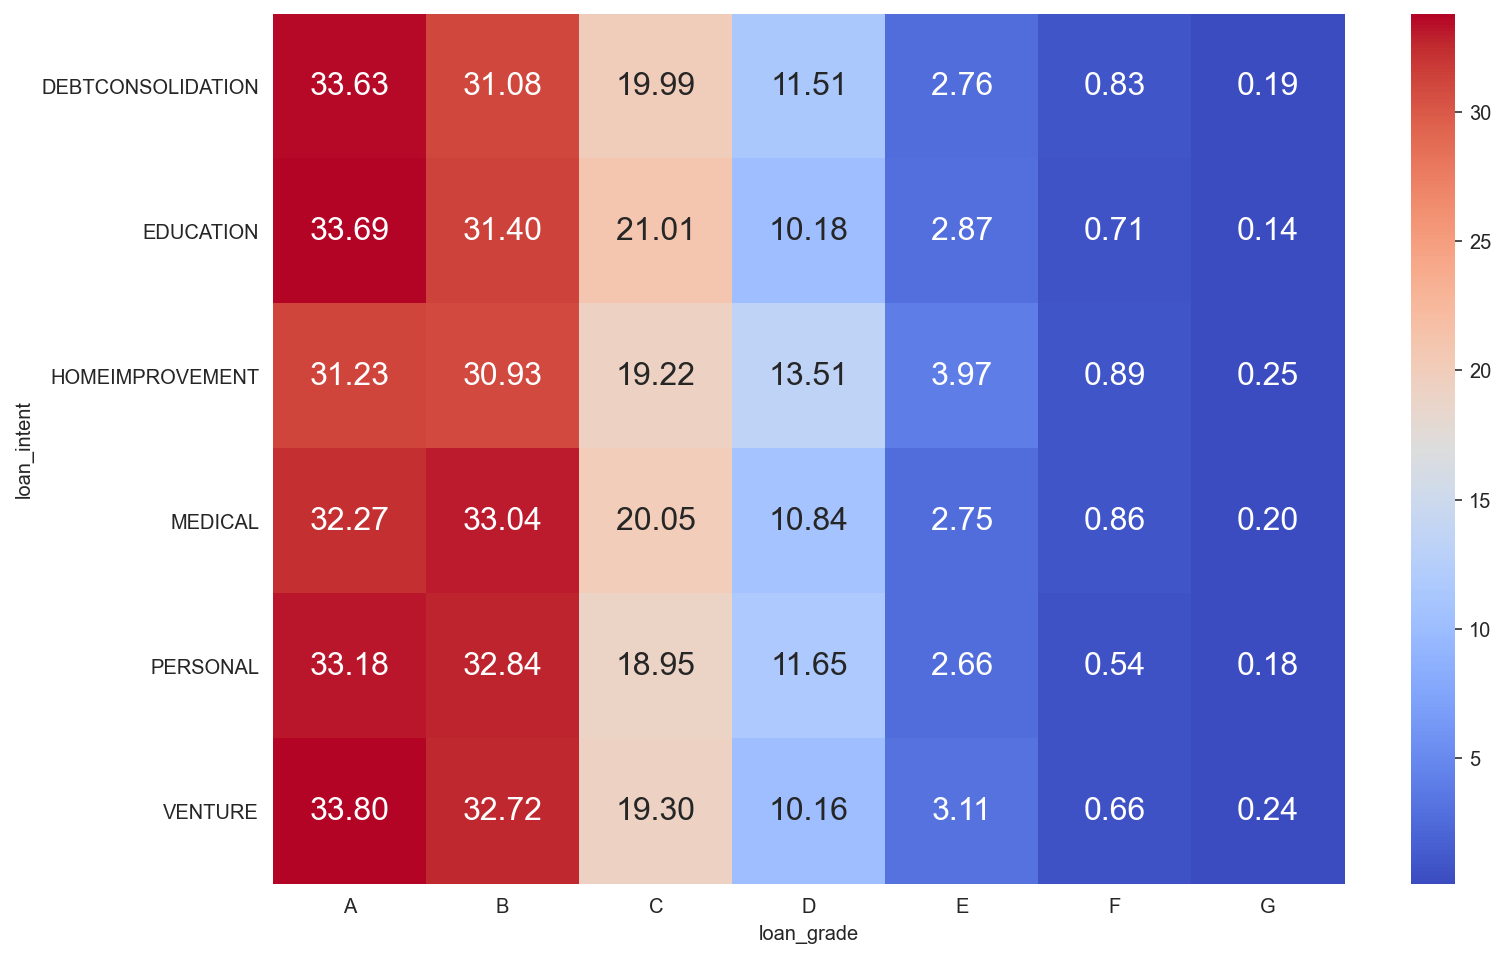

In [48]:
# HeatMap of Cross - tabulation

plt.figure(figsize=(12,8))
sns.heatmap(cross_index, cmap='coolwarm', annot=True, annot_kws={"size": 16}, fmt='.2f');

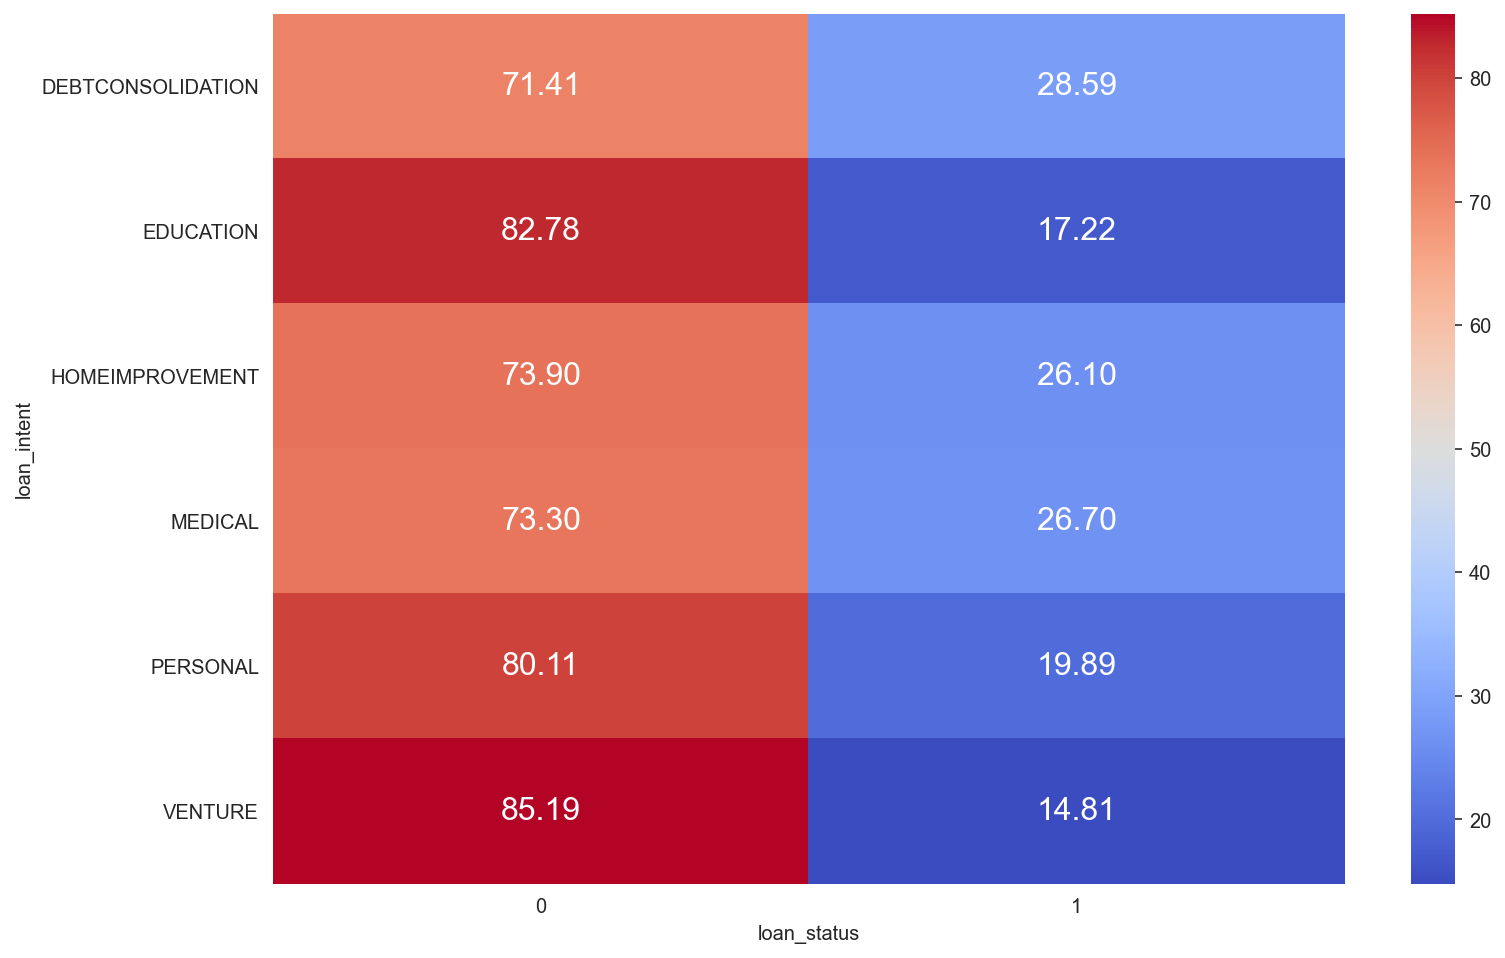

In [49]:
plt.figure(figsize=(12,8))
sns.heatmap(cross_col, cmap='coolwarm', annot=True, annot_kws={"size": 16}, fmt=".2f");

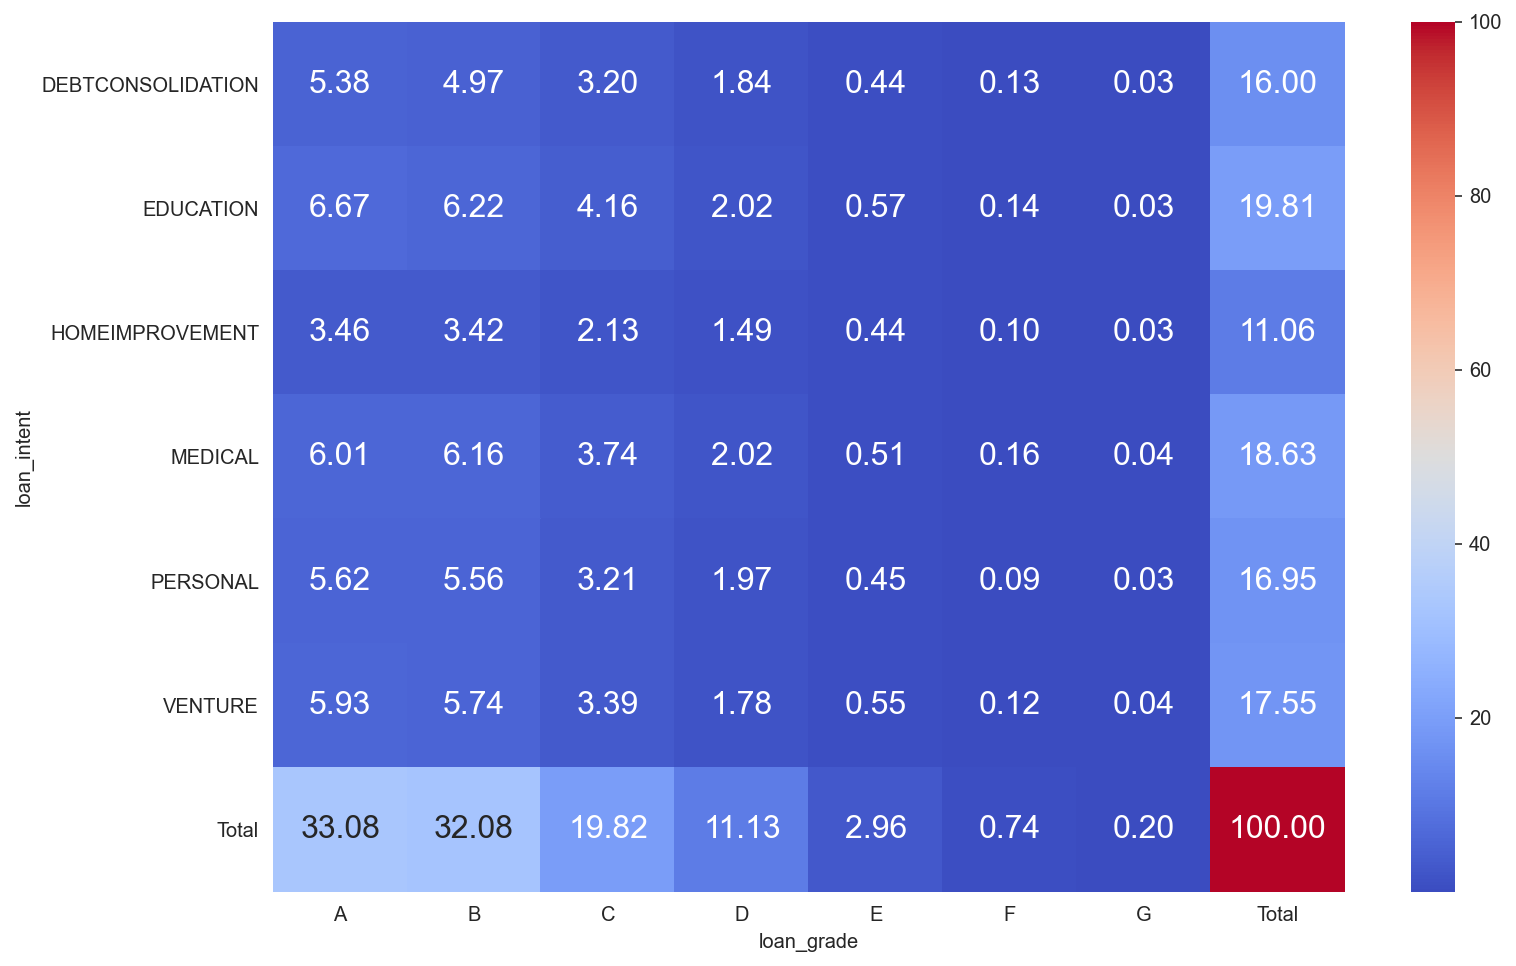

In [50]:
plt.figure(figsize=(12,8))
sns.heatmap(cross_df, cmap='coolwarm', annot=True, annot_kws={"size": 16}, fmt=".2f");

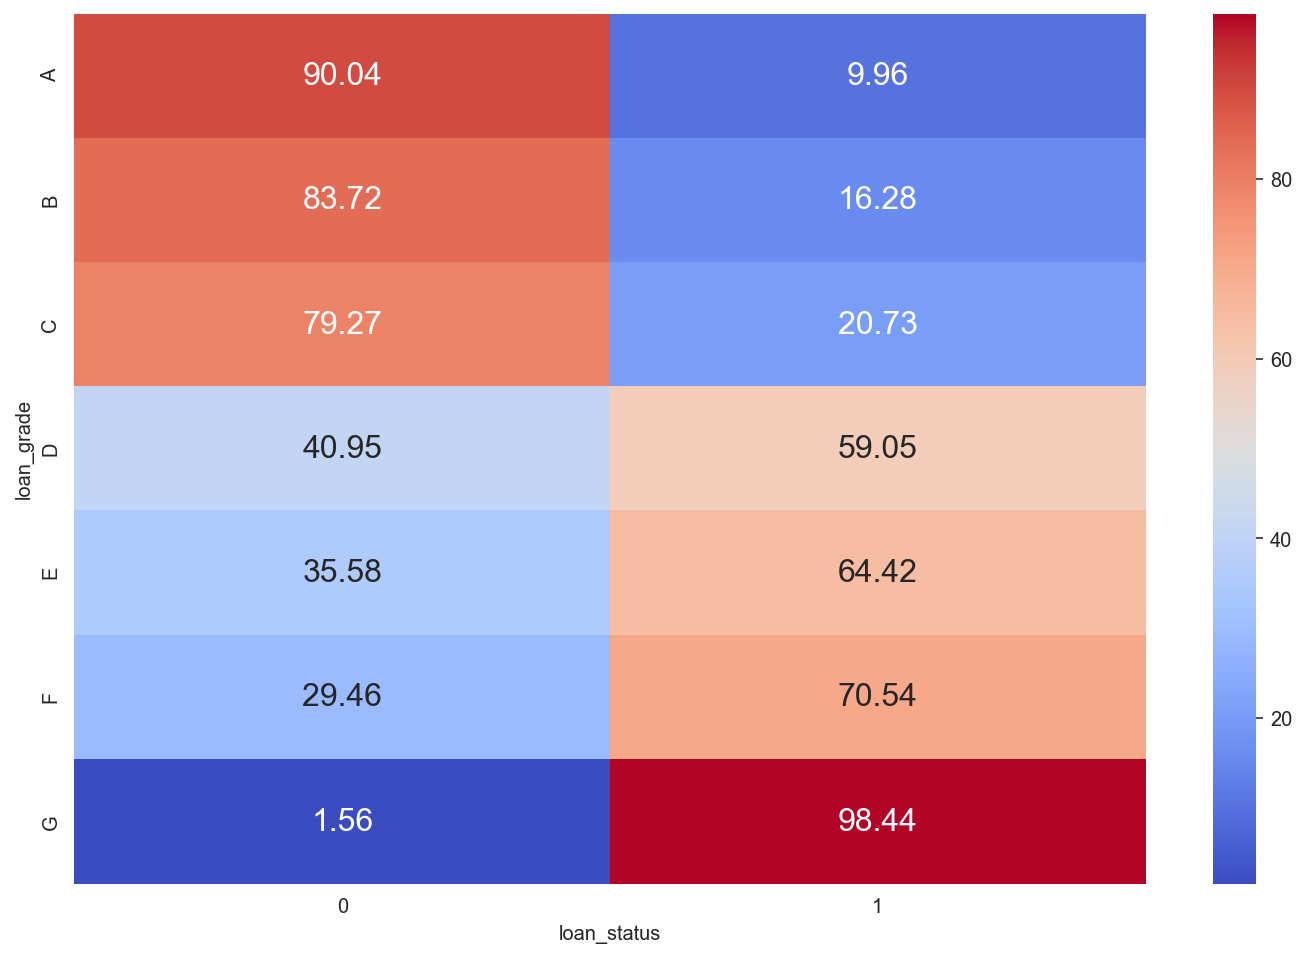

In [51]:
# HeatMap of Cross - tabulation

plt.figure(figsize=(12,8))
sns.heatmap(cross_grade, cmap='coolwarm', annot=True, annot_kws={"size": 16}, fmt='.2f');

In [52]:
# Bi - Variate analysis Loan Status vis-a-vis Length of Credit History

cross_his = pd.crosstab(index = df['cb_person_cred_hist_length'], columns = df_num['loan_status'], 
          normalize='index').round(4) * 100

cross_his

loan_status                     0      1
cb_person_cred_hist_length              
2                           76.43  23.57
3                           77.72  22.28
4                           77.69  22.31
5                           79.37  20.63
6                           79.21  20.79
7                           80.06  19.94
8                           78.65  21.35
9                           79.16  20.84
10                          79.73  20.27
11                          79.91  20.09
12                          79.59  20.41
13                          80.14  19.86
14                          78.86  21.14
15                          78.26  21.74
16                          78.49  21.51
17                          80.84  19.16
18                          78.95  21.05
19                          76.19  23.81
20                          70.97  29.03
21                          70.00  30.00
22                          72.73  27.27
23                          86.36  13.64
24                          80.00  20.00
25                          72.22  27.78
26                          93.75   6.25
27                          63.64  36.36
28                          66.67  33.33
29                          57.14  42.86
30                          77.27  22.73

<AxesSubplot:xlabel='cb_person_cred_hist_length'>

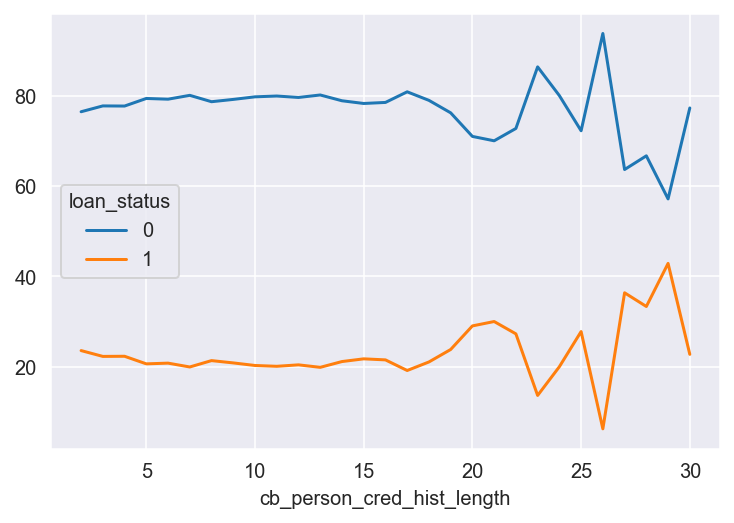

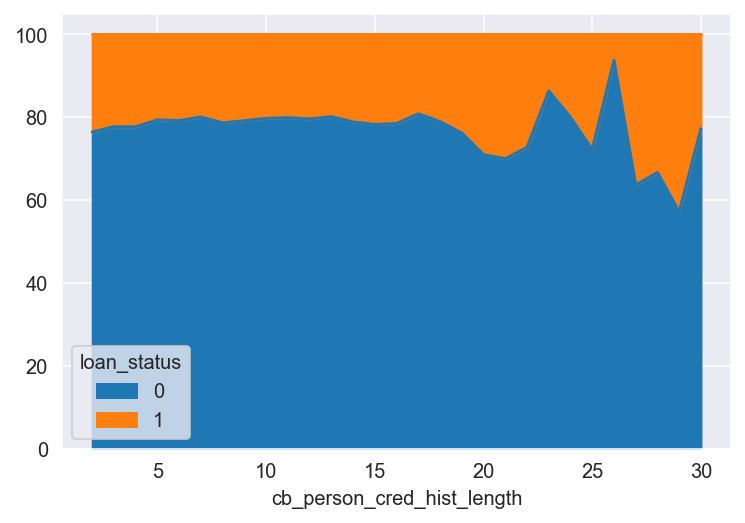

In [53]:
cross_his.plot(kind = "line")

cross_his.plot(kind = "area")


# Observations

# 1. For lesser no. of years of credit history, the default rate is low.
# 2. From 19 years onwards, it keeps increasing with exception 23rd and 26th year.
# 3. 26th year has lowest default rate of mere 6.25%.

### Bi - Variate -  (Numerical - Numerical)

1. Correlation Matrix
2. Correlation Heatmap
3. Scatter Plot

In [54]:
# Correlation Matrix

corr_matrix = df.corr(method = "pearson" )   # other Method Options = method : {'pearson', 'kendall', 'spearman'}

corr_matrix.style.background_gradient(cmap='Greens')



# DataFrame.corrwith : Compute pairwise correlation with another DataFrame or Series.

In [100]:
# DataFrame.corrwith : Compute pairwise correlation with Target and Other Predictor Variables.

df.corrwith(df["loan_status"])

person_age                   -0.021629
person_income                -0.144449
person_emp_length            -0.082489
loan_amnt                     0.105376
loan_int_rate                 0.335133
loan_status                   1.000000
loan_percent_income           0.379366
cb_person_cred_hist_length   -0.015529
dtype: float64

In [101]:
# with the following function we can select highly correlated features.
# It will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()                    # ---> Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:    # ---> we are interested in absolute coeff value
                colname = corr_matrix.columns[i]           # ---> getting the name of column
                col_corr.add(colname)
    return col_corr

In [102]:
# Correlation -  filtering out highly correlated features based on Threhold limit

corr_features = correlation(df, 0.7)
len(set(corr_features))

1

In [103]:
corr_features

{'cb_person_cred_hist_length'}

In [ ]:
# Dropping Highly correlated Variables
 
# df.drop(corr_features,axis=1)   #  ----> Not dropping here since its is only EDA. Part of Pre- Processing and Data Claeaning

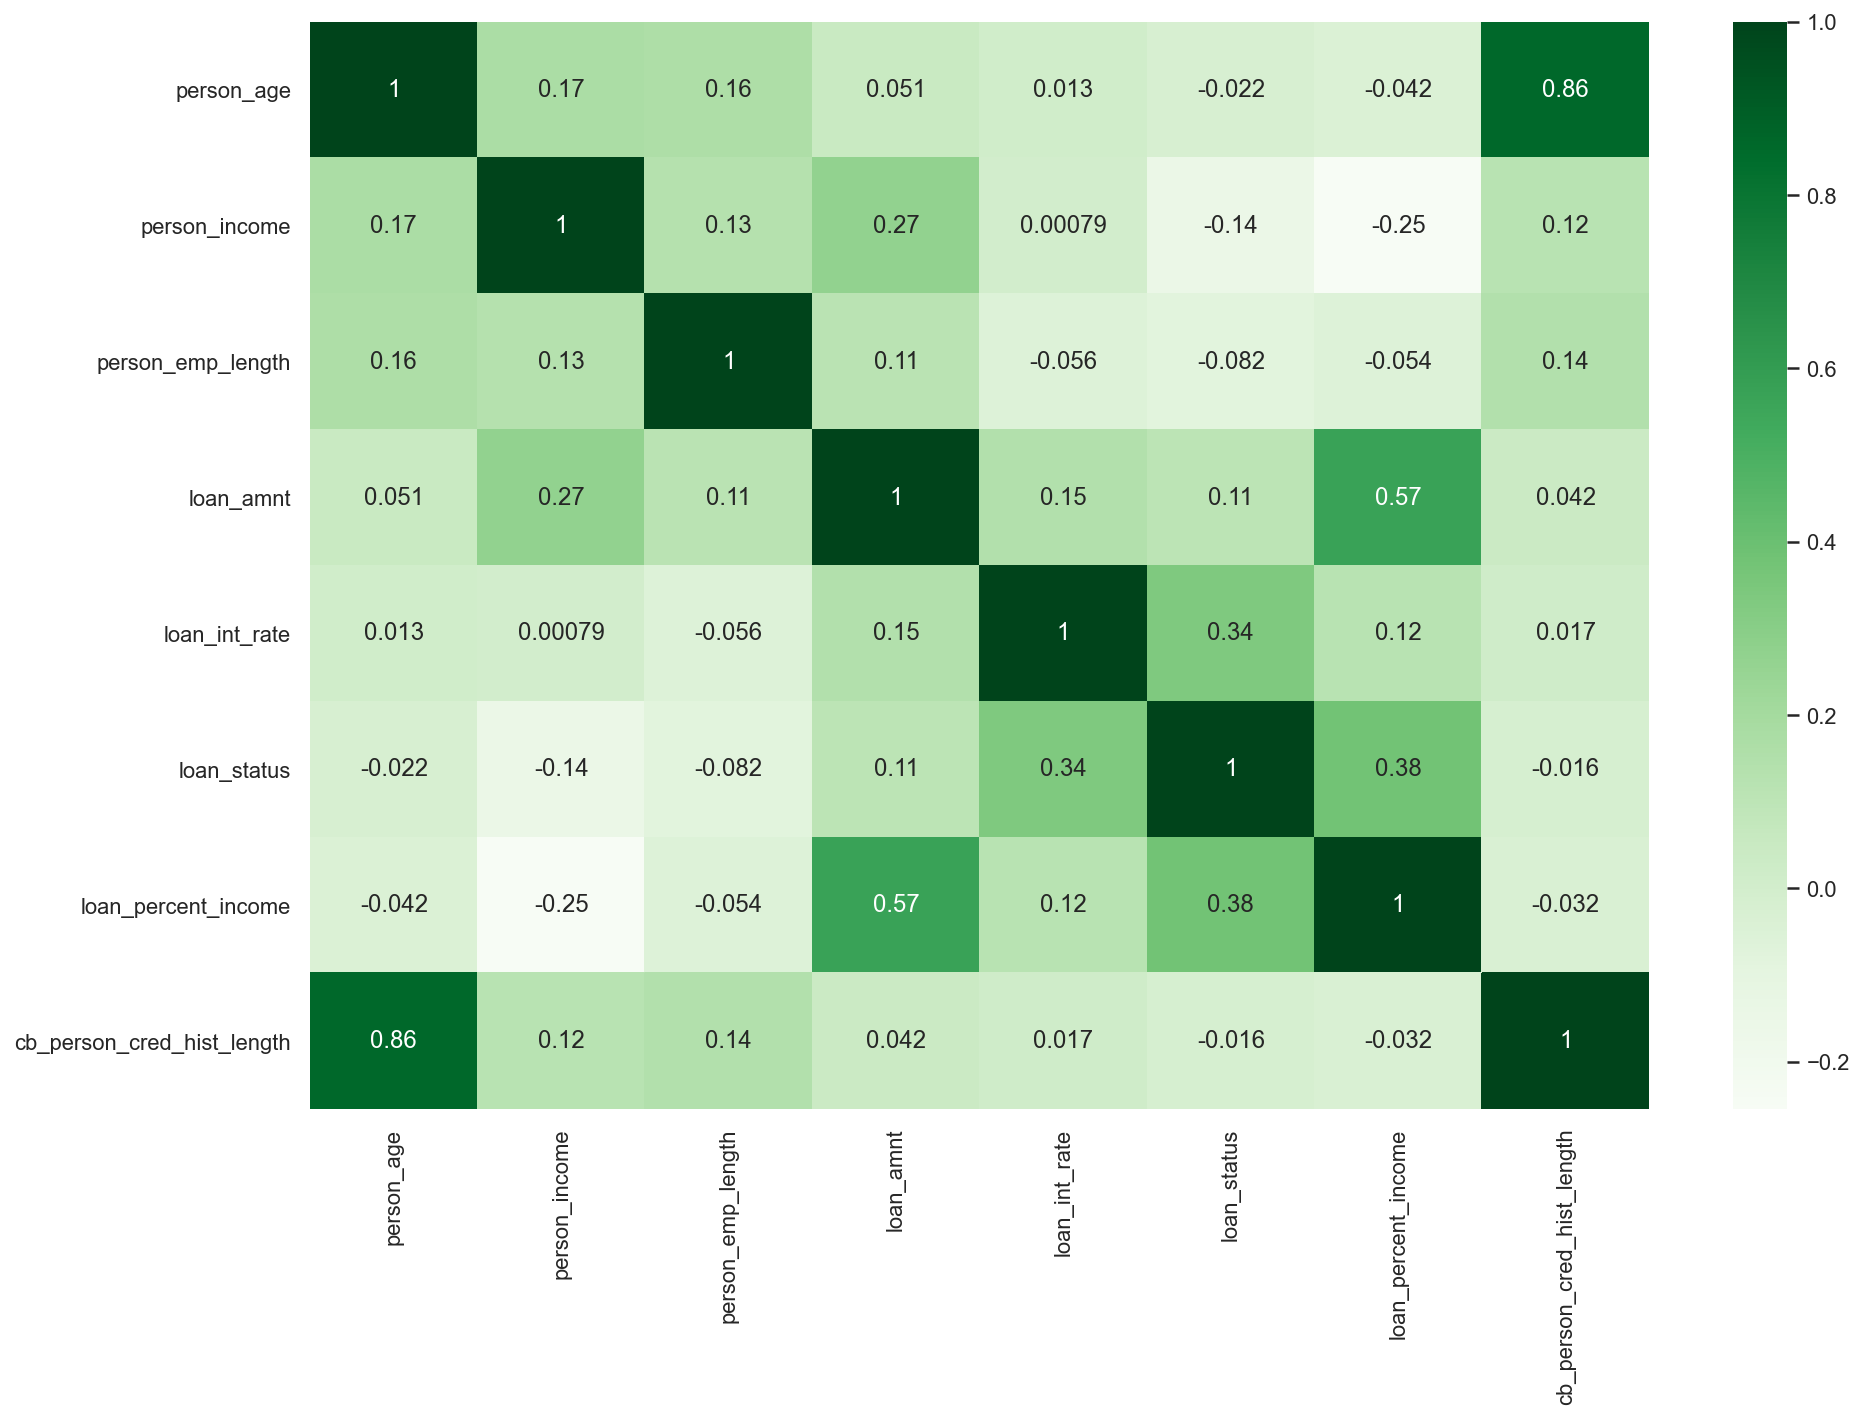

In [104]:
# Correlation Heatmap

# Heat Map

plt.figure(figsize=(15,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap= 'Greens')    # ---> cmap options - viridis, Greens, coolwarm, summer

plt.show()



# Note:

# 1. Since no. of features are not very large, Heatmap is readable. However, in case where fearure are too many,
#    then sort the features according to importance and then create Heatmap. Utilize the functionality of nlargest()
#    function.

### Bi - Variate -  (Numerical - Categorical)

1. Bar Charts

In [ ]:
# list of Categorical Variables -

# 1. person_home_ownership     ---> 4
# 2. loan_intent               ---> 6
# 3. loan_grade                 ---> 7
# 4. cb_person_default_on_file  ---> 2


# list of Numerical Variables -

# 1. person_age
# 2. person_income
# 3. person_emp_length
# 4. loan_amnt
# 5. loan_int_rate
# 6. loan_percent_income
# 7. cb_person_cred_hist_length

# Target Variable

# loan_status ---> Binary Classification

# Now, 

# Q.1 --> What's the average age of applicants having their own home ?
# Q.2 --> What's the relationship between Income and Loan grade ?
# Q.3 --> What's the relationship between Income and cb_person_default_on_file ?
# Q.4 --> What's the relationship between Income and Loan amount ?



# Q.5 --> 

<AxesSubplot:title={'center':'Age by Ownership'}, xlabel='person_home_ownership', ylabel='person_age'>

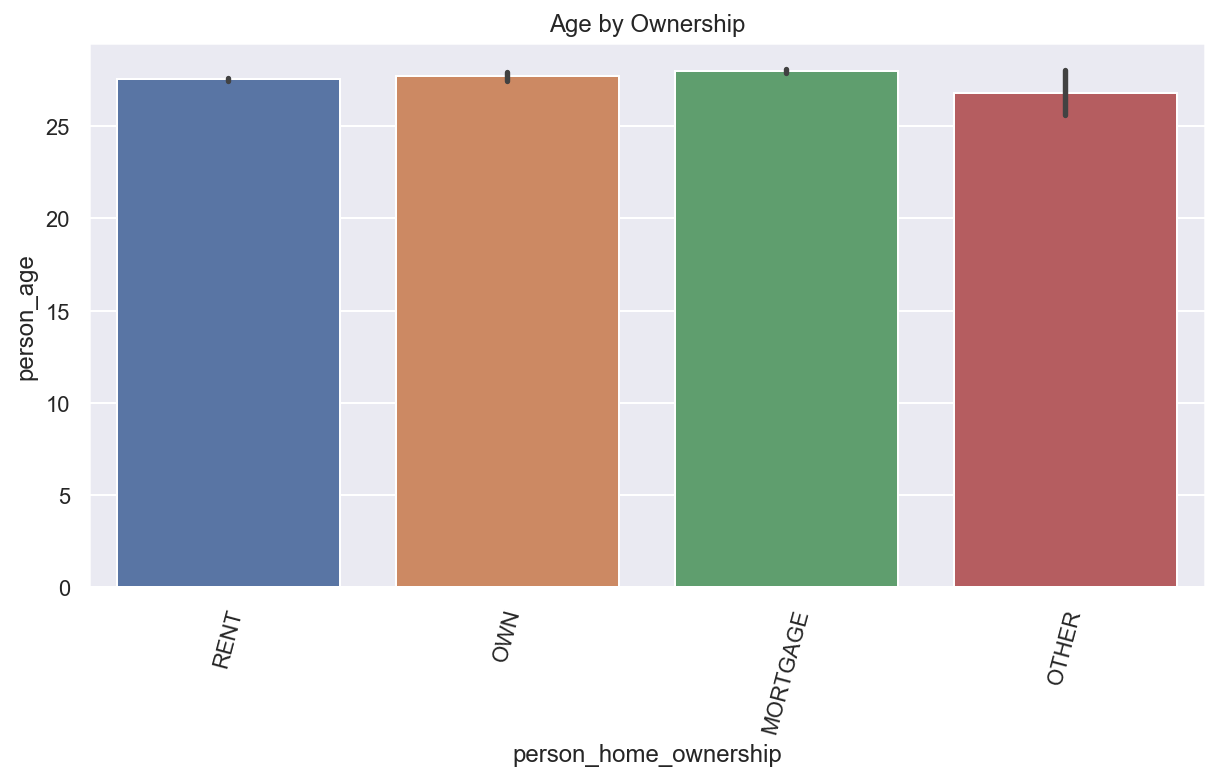

In [105]:
# Q.1 --> What's the average age of applicants having their own home ?


plt.figure(figsize=(10,5))
plt.xticks(rotation=75)
plt.title("Age by Ownership")

sns.barplot(x = df_cat["person_home_ownership"], y = df_num["person_age"])


# Observations

# 1. Average age is 27.73 years.

<AxesSubplot:title={'center':'Reletionship between Income and Loan Grade'}, xlabel='loan_grade', ylabel='person_income'>

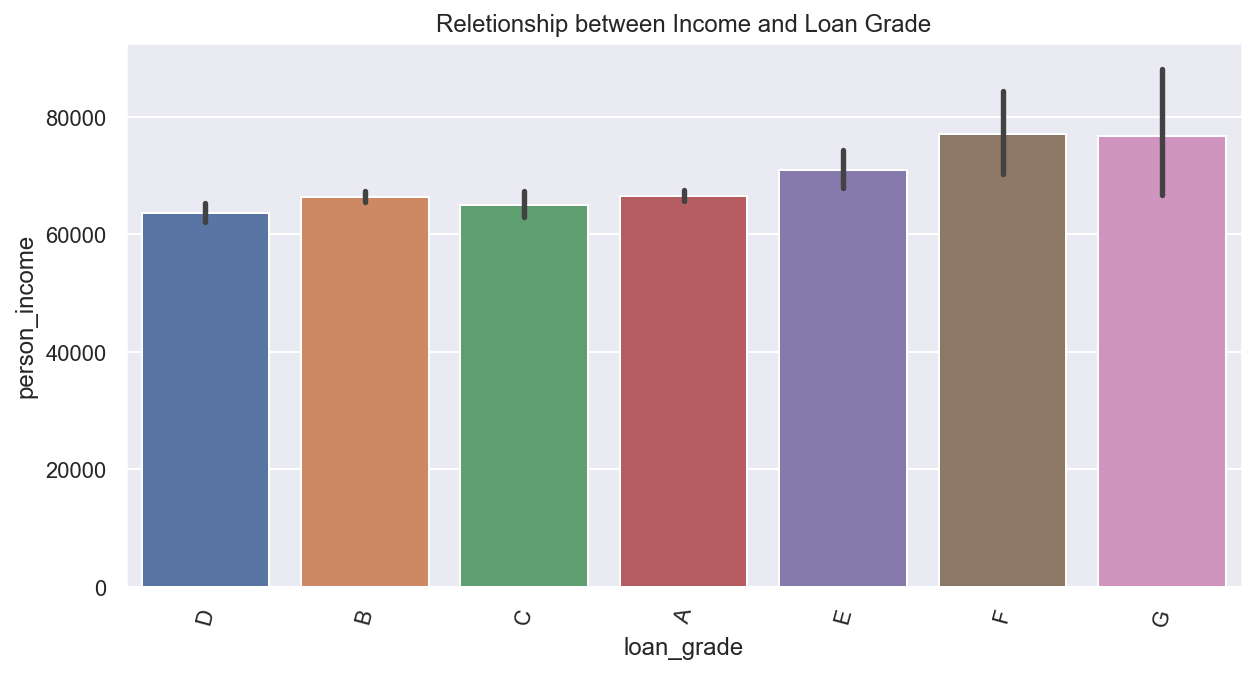

In [128]:
# Q.2 --> What's the relationship between Income and Loan grade ?

plt.figure(figsize=(10,5))
plt.xticks(rotation=75)
plt.title("Reletionship between Income and Loan Grade")

sns.barplot(x = df_cat["loan_grade"], y = df_num["person_income"])

<AxesSubplot:title={'center':'Reletionship between Income and Previous Default'}, xlabel='cb_person_default_on_file', ylabel='person_income'>

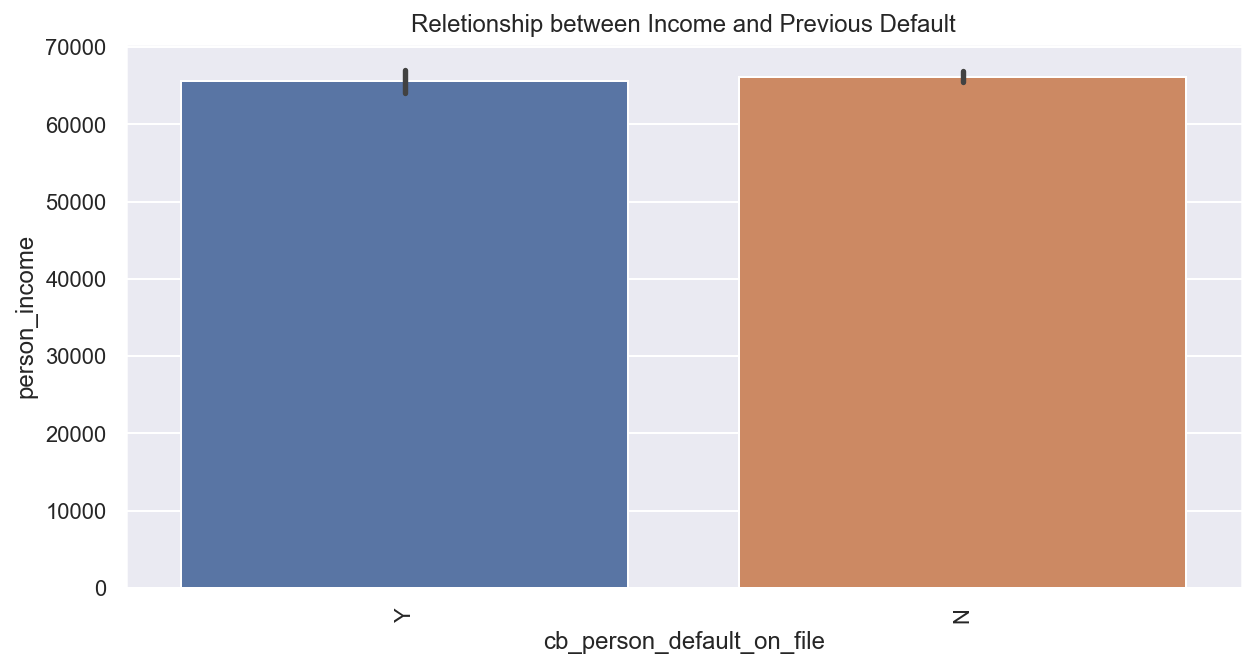

In [107]:
# Q.3 --> What's the relationship between Income and cb_person_default_on_file ?

plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title("Reletionship between Income and Previous Default")

sns.barplot(x = df_cat["cb_person_default_on_file"], y = df_num["person_income"])

## 15. Detailed Insights (variable - wise)








###   Age

1.	Age is numerical variable. 
2.	There are no Missing values. 
3.	Age variable ranges from 20 to 144 which definitely creates suspicion about the accuracy of data.  
4.	Mean age of 27.74 indicates data is highly right skewed.  skew = 2.58.
5.	As per box – plot proximity rule, there are 1494 Outliers. (4.58%)
6.	All outliers are on higher side. 
7.	As per Box-plot, Outliers ranges from 41 to 144. 
8.	Most Outliers lie between age 41 to 70.
9.	As per Scatter plot, the variable Age has non – linear correlation with all other numerical variables except Credit         history length. There is no fixed pattern.


###   Annual Income

1.	Annual Income is again a numerical variable. 
2.	The problem statement is silent about the currency. We assume the currency as INR. 
3.	There are no Missing values.
4.	Income Variable ranges from 4000 to 6000000. Huge range and must be Standardized. Annual Income of Rs. 4000 must not be     eligible for any type of loan.
5.	The distribution of Annual Income is highly right skewed. 
6.	Mean Annual Income is Rs. 66075 and Standard Deviation is 61983. This seems to be a great variation.
7.	As per box – plot proximity rule, there are 1484 Outliers (4.55%).
8.	All outliers are on higher side. 
9.	As per Box-plot, Outliers ranges from   to 
10.	As per Scatter plot, the variable Annual Income has non – linear correlation with all other numerical variables. There     is no fixed pattern.


###   Home ownership

1.	Home Ownership is a Nominal Categorical Variable.
2.	There are 4 unique values in it namely,
      RENT   -              50.48%
      MORTGAGE -   41.26%
      OWN -                 7.93%
      OTHER-              0.33%
4.	The category Other is not defined and is very rare and is safe to ignore.
5.	There are no Missing Values in the Variable Home Ownership.
6.	From Bank’s perspective, the borrower with Own House are considered to be less risky. However, it should not be the         sole consideration.
7.	Analyse the above categories with Target Variable i.e. Loan Status.




###  Employment length (in years)

1.	No. of years of employment is a numerical variable.
2.	This variable has Missing values. The magnitude of missing is around 2.75%.
3.	It seems the missing values are not because of any error.
4.	It’s a classic case of Structurally Missing Data. It is missing because it should not exist. The reason for missingness     is perhaps some borrowers have their Own business and is not employed.
5.	Considering the reason of missingness and magnitude of missing data, the suggested course of action is List – wise         deletion of missing values.
6.	The maximum employment length is 123 years, an indication of error.
7.	The distribution of years of employment is again right skewed. 
8.	As per IQR proximity rule, there are 853 Outliers. (2.70%)


###  Loan Intention

1.	Loan intention is a Nominal Categorical Variable.
2.	There are 6 unique values in it namely,
	   EDUCATION   -            19.81%
	   MEDICAL -                18.63%
	   VENTURE -                17.55%
	   PERSONAL -               16.94%
	   DEBT CONSOLIDATION -     16.00%
	   HOME IMPROVEMENT -       11.06%
2.	As per my experience, the default rate in Personal and Debt Consolidation is highest.
3.	There are no Missing values in Loan intention variable.



###  Loan Grade

1.	prima facie, this variable is Ordinal Categorical Variable.
2.	There are no details given about this Variable like on what criteria grades are allotted. Here, we are assuming, higher     the grade, lower is the chances of Default. Going by that logic, borrowers categorized as Grade – A must have low           probability of getting Default and vice – versa. We will check the percentage of Default for every grade.
3.	There are no Missing Values.
4.	There are 7 unique values in it namely,
	  A   -   33.08%
	  B   -  32.08%
	  C   -  19.82%
	  D   -  11.13%
	  E   -  2.96%
	  F   -  0.74%
	  G   -  0.20%
     
     
###  Loan Amount

1.	Loan amount is a Numerical Variable.
2.	There are no Missing Values.
3.	Loan amount ranges from Rs. 500 to Rs. 35000.
4.	Loan amount of Rs. 500 is too low to believe on genuineness of data.
5.	Loan amount distribution is asymmetrical and skewed.
6.	As per IQR Proximity Rule, there are 1689 Outliers in the variable Loan Amount. (5.18%).
7.	As per Box – Plot, most of the Outliers are between 23,000 to 27,000.
8.	As per Scatter Plot, Loan amount is in non – linear relation with other variables.



###  Interest rate


1.	Interest rate is a Numerical Variable.
2.	Though explicitly not mentioned anywhere about the Unit but it is in terms of percentage (%).
3.	Interest rates ranges from 5.42% to 23.2%.
4.	Technically, this variable should be Categorical with fewer no. of interest rates, if it belongs to One Bank or FI.
5.	There are 29465 values and 348 unique values.
6.	There are too many Missing values 3116 (9.56%).
7.	There are mere 6 Outliers in Intr. rate variable.
8.	Nature of Variable and Magnitude of Missing values makes this variable a tricky one.
9.	As per my Domain Knowledge and Dendrogram, this variable is important and have high predictive power.
10.	So, dropping the variable is not an option.
11. As per Dendrogram, this variable is highly co - related to variable Employment length and variable Past Default             History.
12.	Suggested course of action is –
     i.	 Drop Outliers
    ii.	 Impute Missing values
    iii. Filter top 10 or 20 high frequency int. rate
    iv.	 Analyse the above with Target Variable.
    
    

### 	Loan - Income Percent

1.	Loan to Income is a Numerical Variable.
2.	It is in relative term. (In terms of ratio).
3.	In finance jargon, it is called as "Debt to Income ratio". (DTI).
4.	Good / Ideal DTI ratio ---> The percentage of DTI ratio may vary from lender to lender. However, in general, a DTI         ratio of up to 40% may be considered suitable for getting a loan approved. DTI of 21% - 35% is considered as very good.
5.	Lesser the ratio, lesser are the chances of Default and vice – versa.
6.	There are no Missing values.
7.	The ratio ranges from 0 to 0.83.
8.	The distribution is asymmetrical and skewed.
9.	As per IQR proximity rules, there are 651 Outliers (2%).
10.	There are just 77 unique values. Technically, it is Categorical and must analyse that way only.
11.	By analysing, the loan status with DTI ratio, it supports the above rationale. As the DTI increases, the rate of           default also increases and vice – versa.


###  History of Default

1.	History of Default is Nominal Categorical Variable.
2.	There are no Missing values.
3.	There are only 2 unique values namely,
4.	Yes – 17.63%
5.	No - 82.37%
6.  Analysing this variable w.r.t. Loan Status variable will give some vital insights.


###  Credit history length

1.	Credit history length is Numerical variable.
2.	There are no Missing values.
3.	The variable ranges from 2 years to 30 years.
4.	Longer the history, more knowledge about the Borrower which means more transparency and ultimately more reliable.
5.	So, based on Domain knowledge, Person's Credit History length variable is positively correlated with Target Variable.
6.	There are mere 29 categorical values.

## 16. Insights from Bi - Variate Analysis

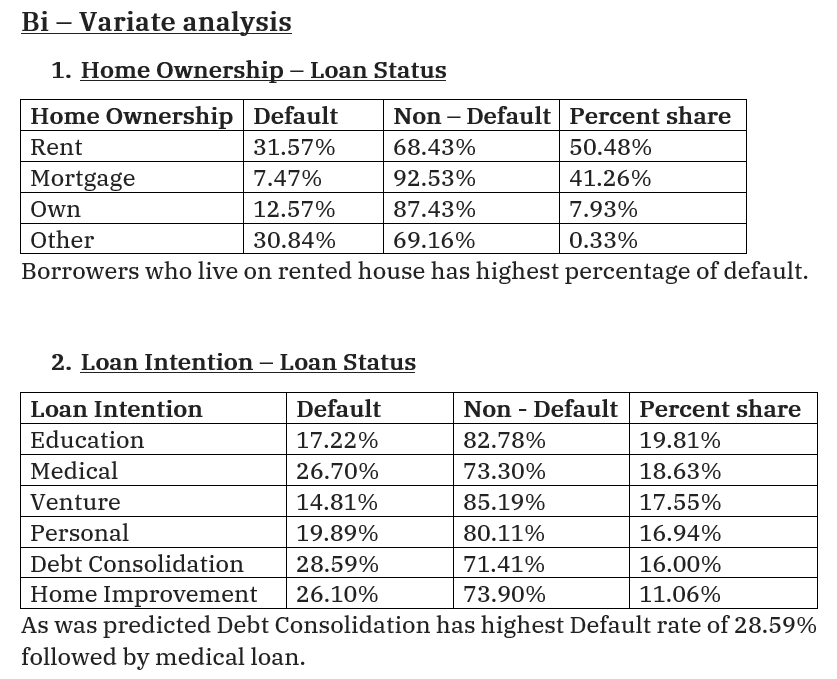width="200"/>
</div>

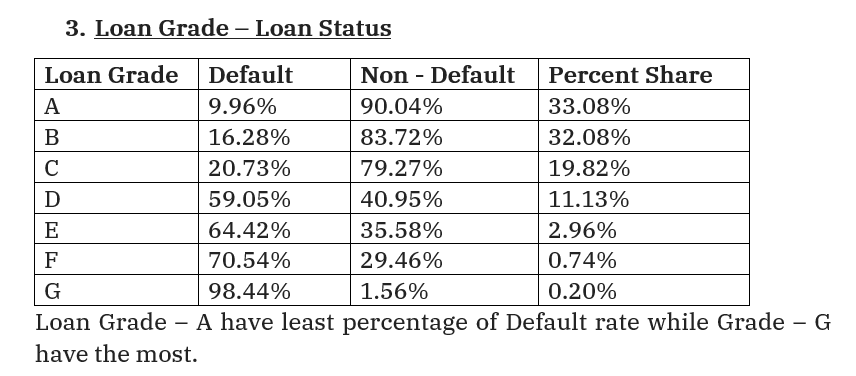

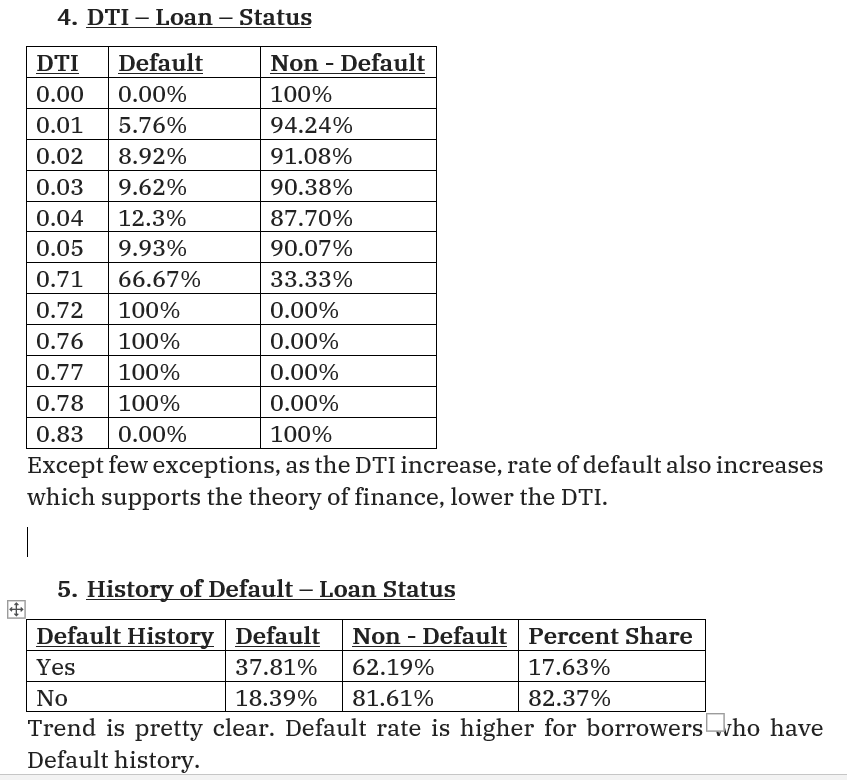width="200"/>
</div>

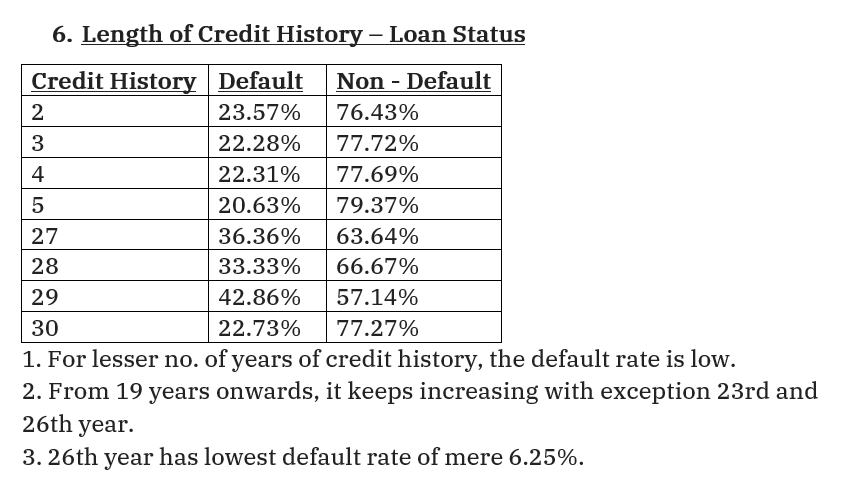 width="200"/>
</div>

## 17. Important Insights


1.	It’s a Binary Classification problem consist of Target Variable “Loan Status” - 
	  * 0 --> Not Default
	  * 1 --> Default

2.	There are records of **32,581** borrowers evaluated on 12 parameters (columns).

3.	Target Variable is highly **Imbalanced**. The ratio of Target Variables is 21.82: 78.18 (0:1) (Majority class is twice      of Minority class).

4.	Mainly, there are 4 Categorical Variables (dtype = Object). The details of which as hereunder:
       * Binary – History of Default
	   * Nominal – Home Ownership, Loan Intention
       * Ordinal – Loan Grade
       
5.	There are only 2 Variables which have Missing Values:
	    * Interest rate -       **9.56%** 
  	  * Employment length -   **2.75%**
      There are total 4011 missing values in a given dataset.

6.	There are **165** duplicate values.

7.	Except Int. rate variable, all variables are Asymmetric and are Skewed.

8.	There are neither Zero – Variance (constant) variables nor near Zero – Variance (Quasi-Constant) variables. (Threshold      = 0.10).

9.	Below are the Variable – wise Outliers computed on the basis of IQR Proximity Rules:
      * Age = 1494
      * Income = 1484 
      * Employment length = 853
      *	Loan amount = 1689
      * Interest rate = 6
      * Debt to Income ratio = 651 
      * Credit History length = 1142

10.	As per Heatmap, the following pair of variables are highly correlated:
      *  Age & Credit History length - 0.86

## 18. Data Pre - Processing Checklist

1. Import Scikit learn library.
2. Handling Missing Values - Drop / Impute
3. Handling Outliers - Drop
4. Handling Imbalance of Target Variable - Resampling
5. Remove Duplicate values
6. Feature Scaling of High range Variables like Income variable
7. Categorical Encoding of Categorical features
8. Feature Selection based on  multi-collinearity, zero or low variance.
9. Splitting the data into train - test.